In [1]:
# Problem Statement

# You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset 
# containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative 
# with many of the same qualities as a diamond). The company is earning different profits on different prize slots. 
# You have to help the company in predicting the price for the stone on the basis of the details given in the dataset so 
# it can distinguish between higher profitable stones and lower profitable stones so as to have a better profit share. 
# Also, provide them with the best 5 attributes that are most important.

In [2]:
#Carat: Carat weight of the cubic zirconia.
#Cut: Describe the cut quality of the cubic zirconia. Quality in increasing order: Fair, Good, Very Good, Premium, Ideal.
#Color: Colour of the cubic zirconia, with D being the best and J the worst.
#Clarity: Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, 
#I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
#Depth: The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
#Table: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
#Price: the Price of the cubic zirconia.
#X: Length of the cubic zirconia in mm.
#Y: Width of the cubic zirconia in mm.
#Z: Height of the cubic zirconia in mm.

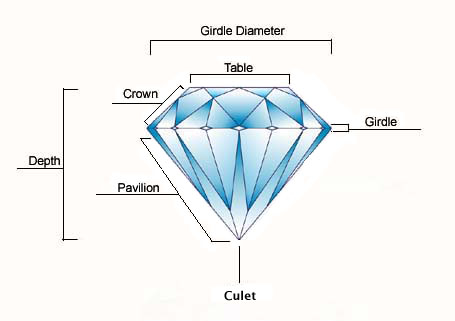

In [3]:
import pandas as pd
import os

In [4]:
os.chdir('C:\\Users\\yashi')

In [5]:
df = pd.read_csv('gemstone_train.csv')

In [6]:
df.head()

id  carat        cut color clarity  depth  table     x     y     z  price
0   0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1   1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2   2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3   3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4   4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453

In [7]:
df.tail()

id  carat        cut color clarity  depth  table     x     y  \
193568  193568   0.31      Ideal     D    VVS2   61.1   56.0  4.35  4.39   
193569  193569   0.70    Premium     G    VVS2   60.3   58.0  5.75  5.77   
193570  193570   0.73  Very Good     F     SI1   63.1   57.0  5.72  5.75   
193571  193571   0.34  Very Good     D     SI1   62.9   55.0  4.45  4.49   
193572  193572   0.71       Good     E     SI2   60.8   64.0  5.73  5.71   

           z  price  
193568  2.67   1130  
193569  3.47   2874  
193570  3.62   3036  
193571  2.81    681  
193572  3.48   2258

In [8]:
df.shape

(193573, 11)

In [9]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [13]:
df.describe()

id          carat          depth          table  \
count  193573.000000  193573.000000  193573.000000  193573.000000   
mean    96786.000000       0.790688      61.820574      57.227675   
std     55879.856166       0.462688       1.081704       1.918844   
min         0.000000       0.200000      52.100000      49.000000   
25%     48393.000000       0.400000      61.300000      56.000000   
50%     96786.000000       0.700000      61.900000      57.000000   
75%    145179.000000       1.030000      62.400000      58.000000   
max    193572.000000       3.500000      71.600000      79.000000   

                   x              y              z          price  
count  193573.000000  193573.000000  193573.000000  193573.000000  
mean        5.715312       5.720094       3.534246    3969.155414  
std         1.109422       1.102333       0.688922    4034.374138  
min         0.000000       0.000000       0.000000     326.000000  
25%         4.700000       4.710000       2.900000     951.000000  
50%         5.700000       5.720000       3.530000    2401.000000  
75%         6.510000       6.510000       4.030000    5408.000000  
max         9.650000      10.010000      31.300000   18818.000000

In [14]:
df.nunique()

id         193573
carat         248
cut             5
color           7
clarity         8
depth         153
table         108
x             522
y             521
z             349
price        8738
dtype: int64

In [15]:
df = df.drop('id', axis = 1)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import warnings
warnings.filterwarnings('ignore')

### UNIVIRATE ANALYSIS

In [18]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [19]:
df['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

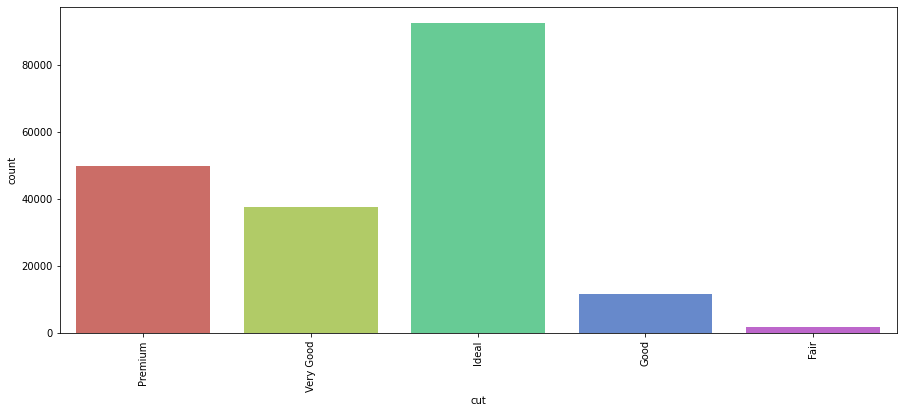

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(df['cut'], data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

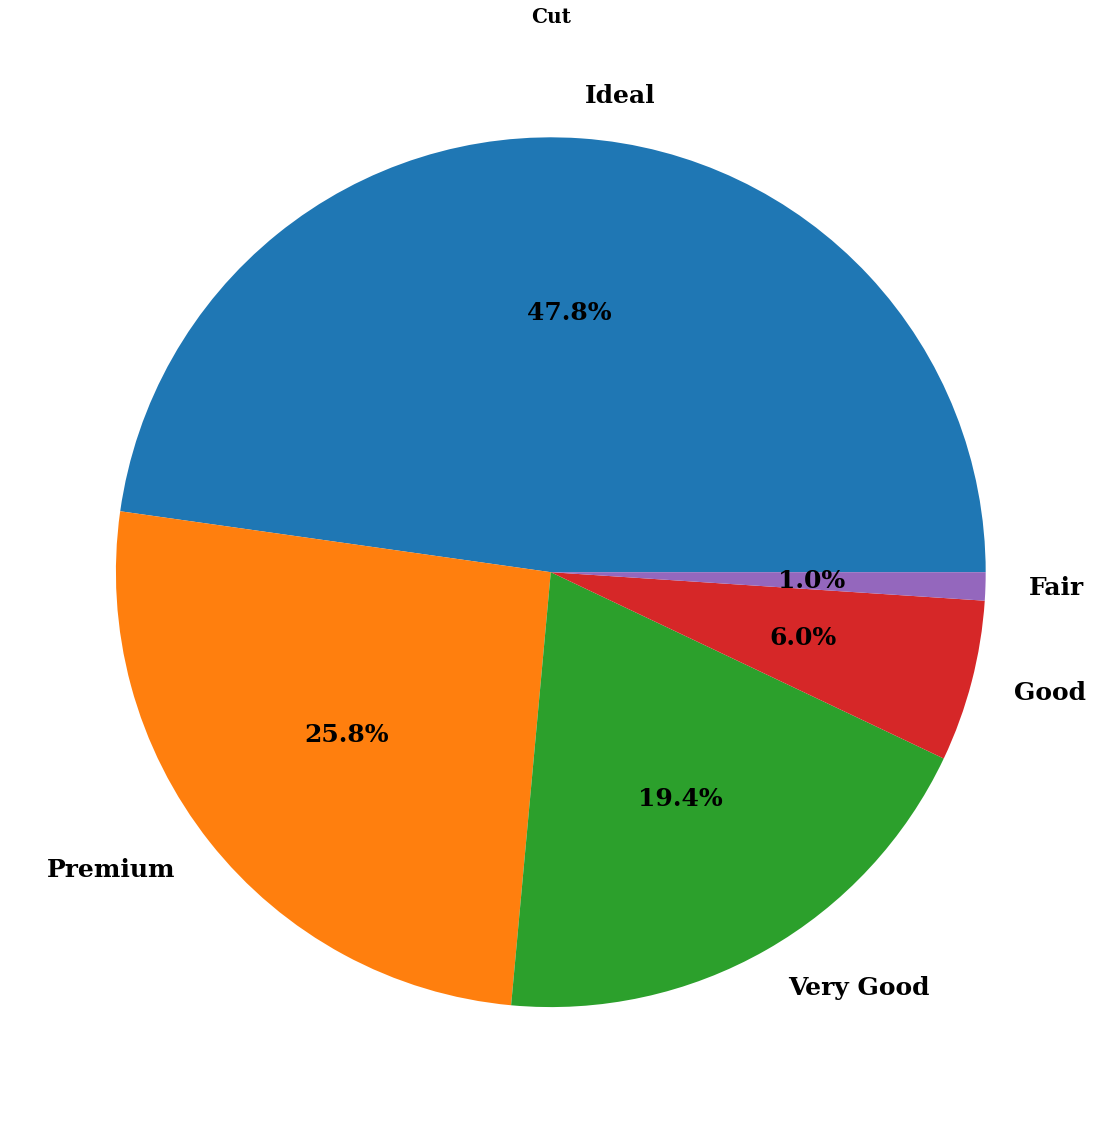

In [21]:
plt.figure(figsize=(30,20)) 
plt.pie(df['cut'].value_counts(), labels=df['cut'].value_counts().index, autopct='%1.1f%%', textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Cut', size=20, **hfont) 
plt.show()

In [22]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [23]:
df['color'].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

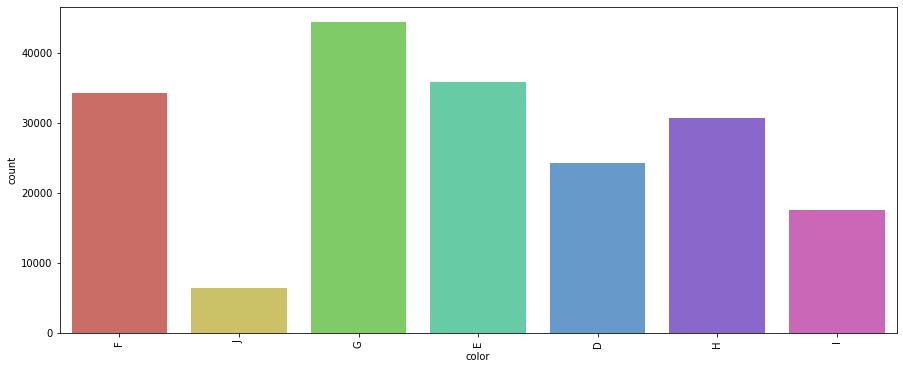

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(df['color'], data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

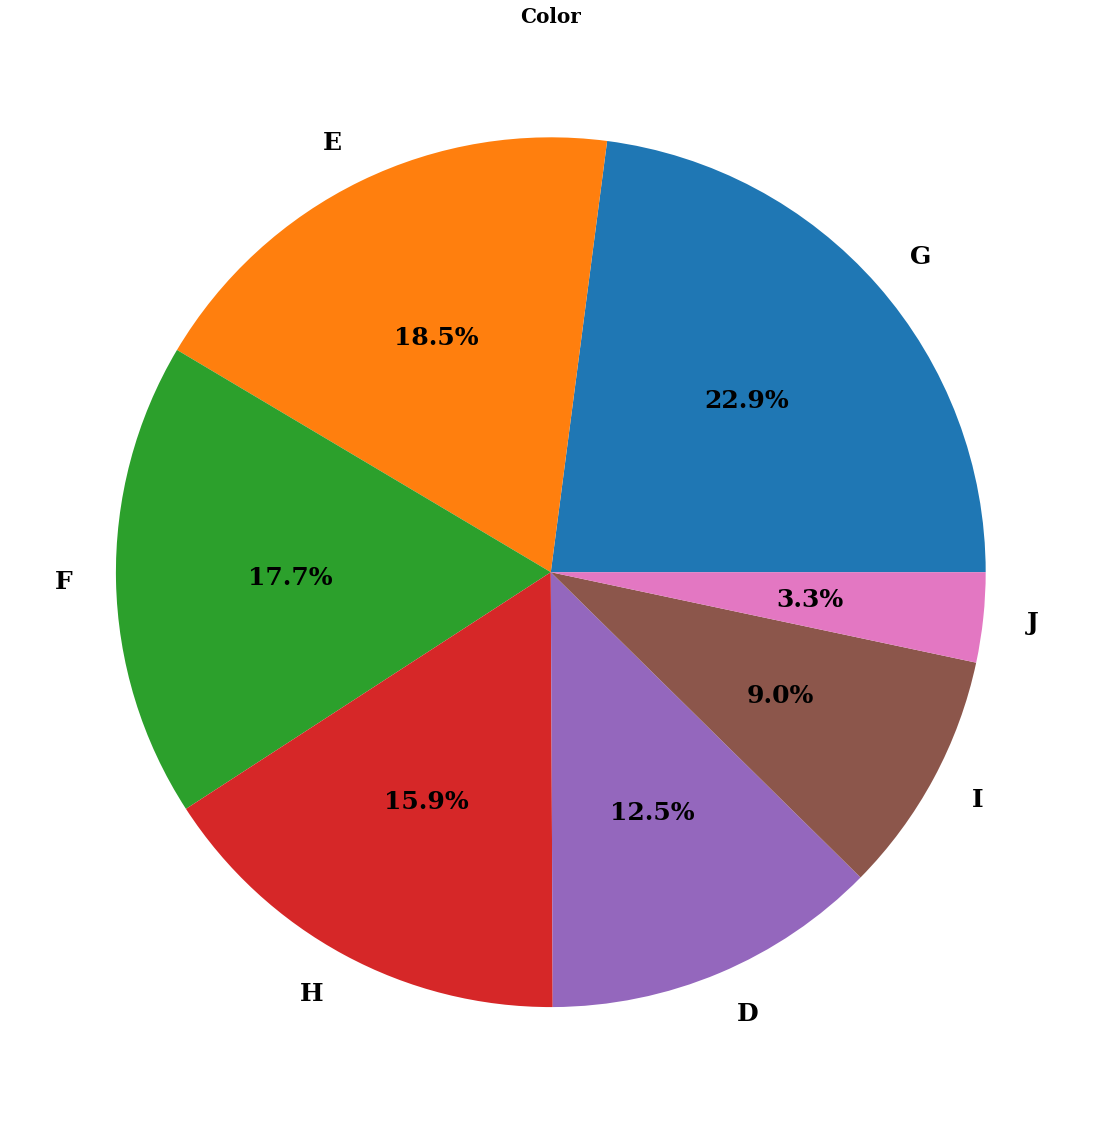

In [25]:
plt.figure(figsize=(30,20)) 
plt.pie(df['color'].value_counts(), labels=df['color'].value_counts().index, autopct='%1.1f%%', textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Color', size=20, **hfont) 
plt.show()

In [26]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [27]:
df['clarity'].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

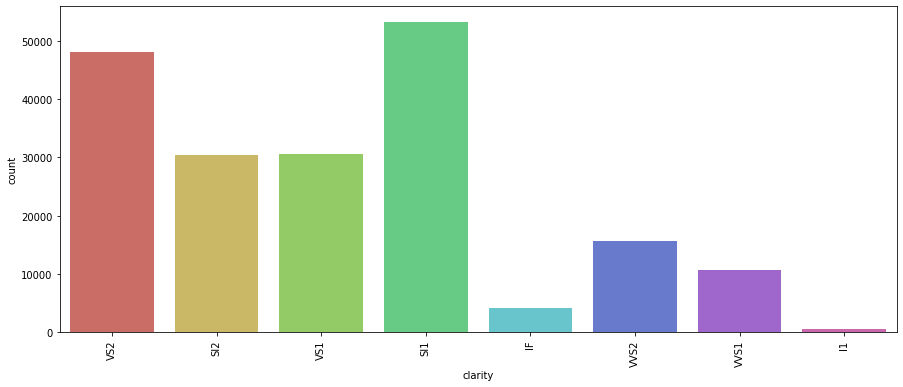

In [28]:
plt.figure(figsize=(15,6))
sns.countplot(df['clarity'], data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

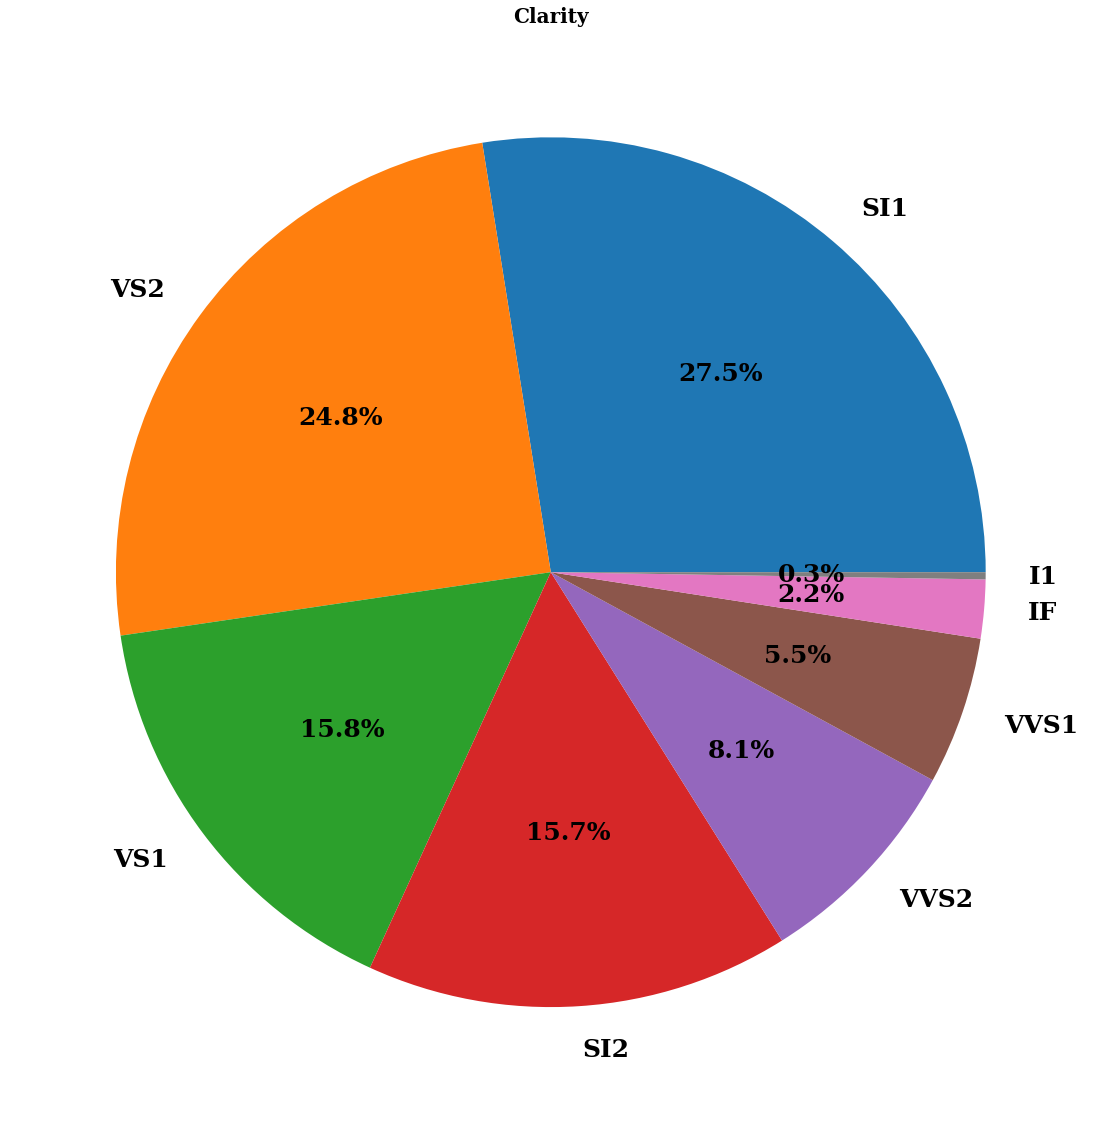

In [29]:
plt.figure(figsize=(30,20)) 
plt.pie(df['clarity'].value_counts(), labels=df['clarity'].value_counts().index, autopct='%1.1f%%', textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Clarity', size=20, **hfont) 
plt.show()

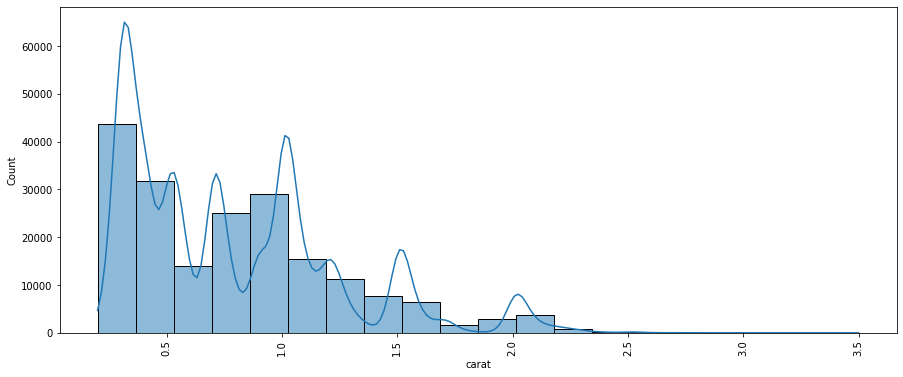

In [30]:
plt.figure(figsize=(15,6))
sns.histplot(df['carat'], kde = True, bins = 20, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

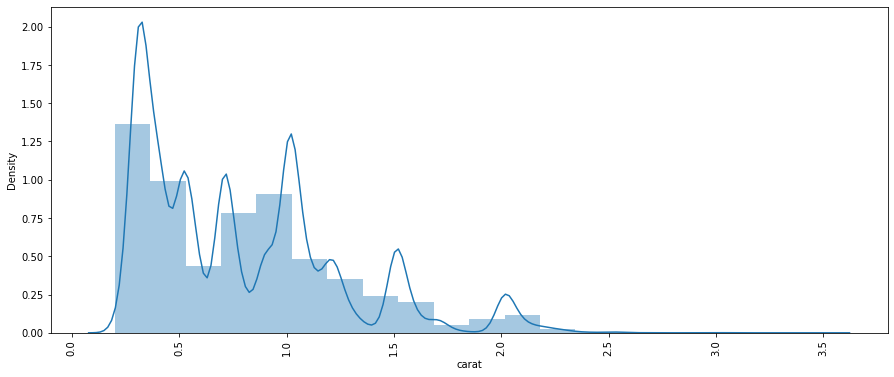

In [31]:
plt.figure(figsize=(15,6))
sns.distplot(df['carat'], kde = True, bins = 20)
plt.xticks(rotation = 90)
plt.show()

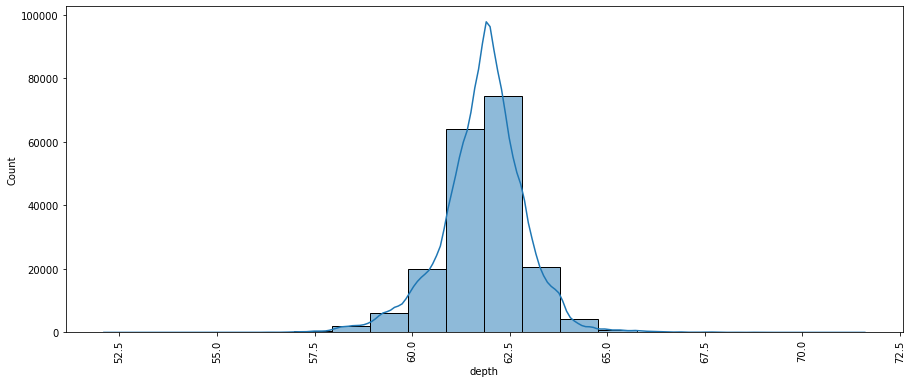

In [32]:
plt.figure(figsize=(15,6))
sns.histplot(df['depth'], kde = True, bins = 20, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

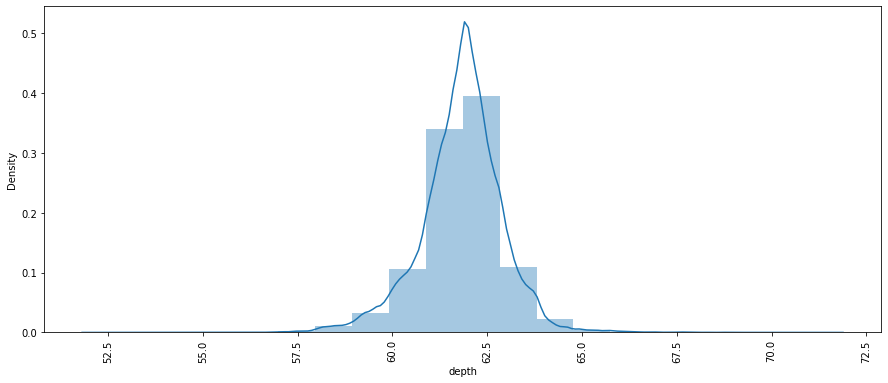

In [33]:
plt.figure(figsize=(15,6))
sns.distplot(df['depth'], kde = True, bins = 20)
plt.xticks(rotation = 90)
plt.show()

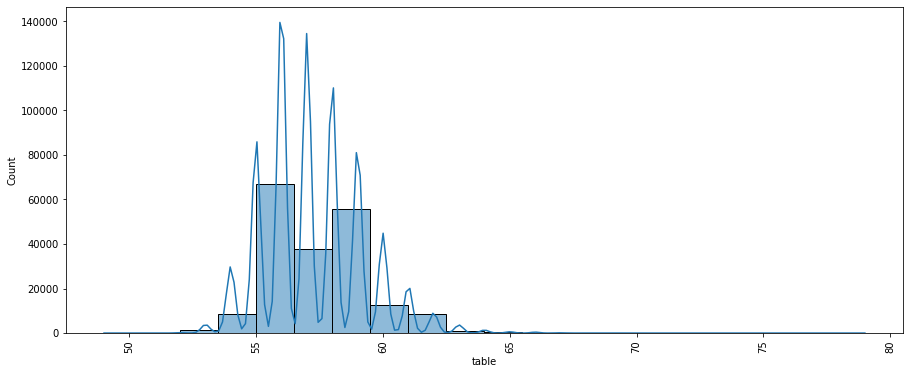

In [34]:
plt.figure(figsize=(15,6))
sns.histplot(df['table'], kde = True, bins = 20, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

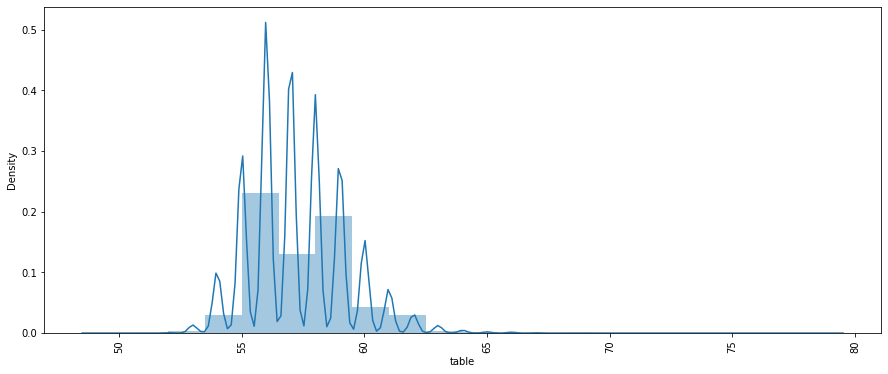

In [35]:
plt.figure(figsize=(15,6))
sns.distplot(df['table'], kde = True, bins = 20)
plt.xticks(rotation = 90)
plt.show()

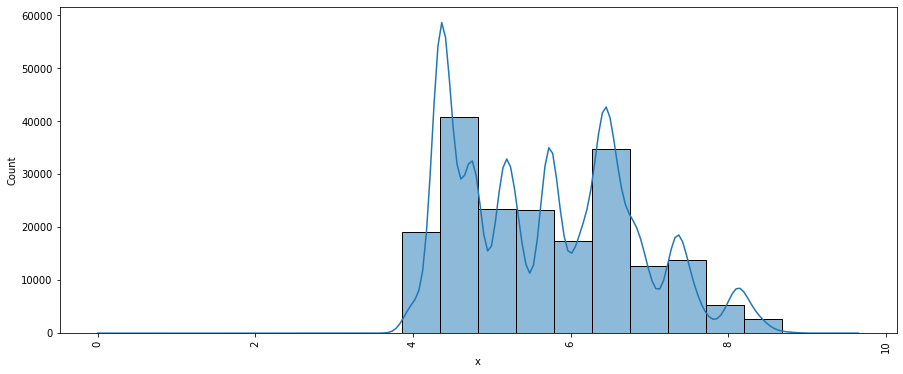

In [36]:
plt.figure(figsize=(15,6))
sns.histplot(df['x'], kde = True, bins = 20, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

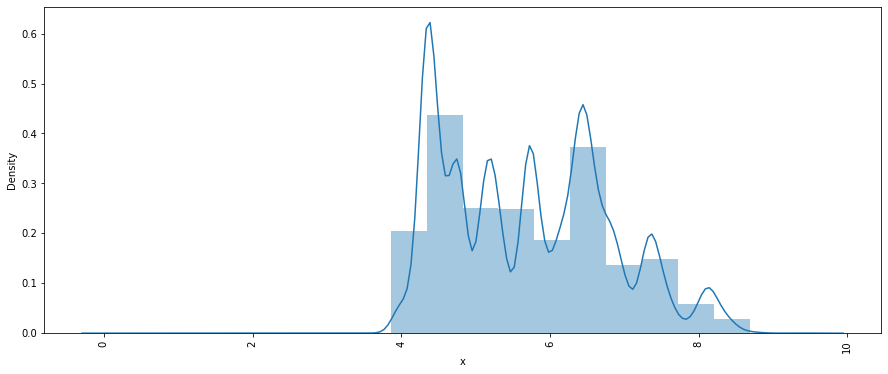

In [37]:
plt.figure(figsize=(15,6))
sns.distplot(df['x'], kde = True, bins = 20)
plt.xticks(rotation = 90)
plt.show()

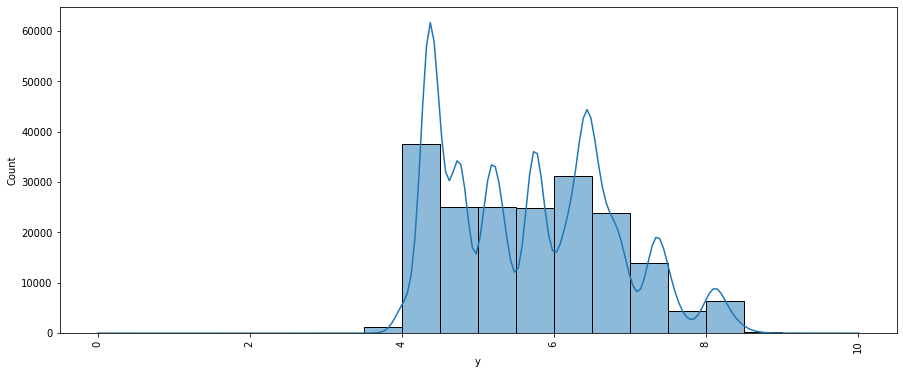

In [38]:
plt.figure(figsize=(15,6))
sns.histplot(df['y'], kde = True, bins = 20, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

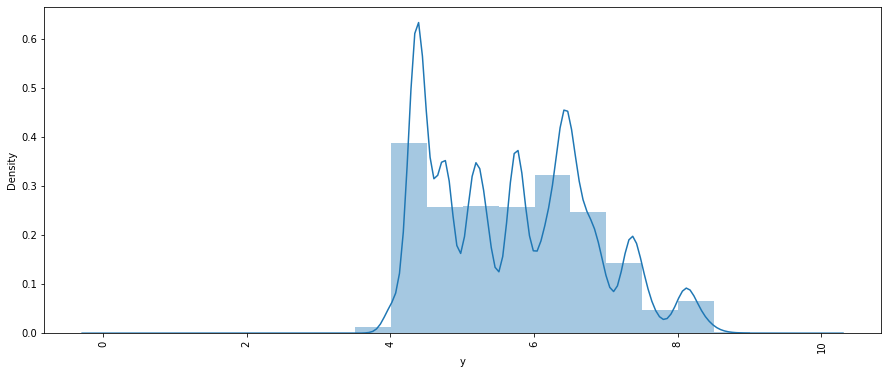

In [39]:
plt.figure(figsize=(15,6))
sns.distplot(df['y'], kde = True, bins = 20)
plt.xticks(rotation = 90)
plt.show()

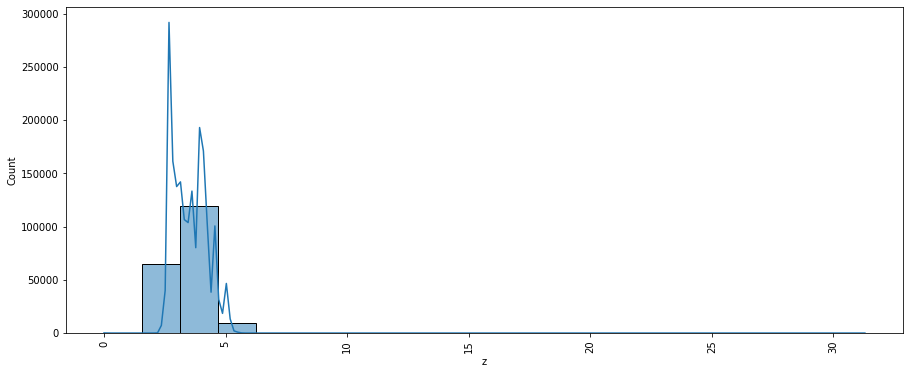

In [40]:
plt.figure(figsize=(15,6))
sns.histplot(df['z'], kde = True, bins = 20, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

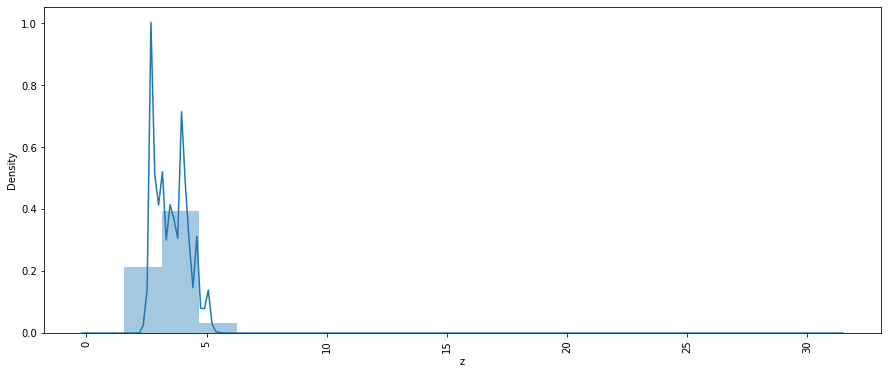

In [41]:
plt.figure(figsize=(15,6))
sns.distplot(df['z'], kde = True, bins = 20)
plt.xticks(rotation = 90)
plt.show()

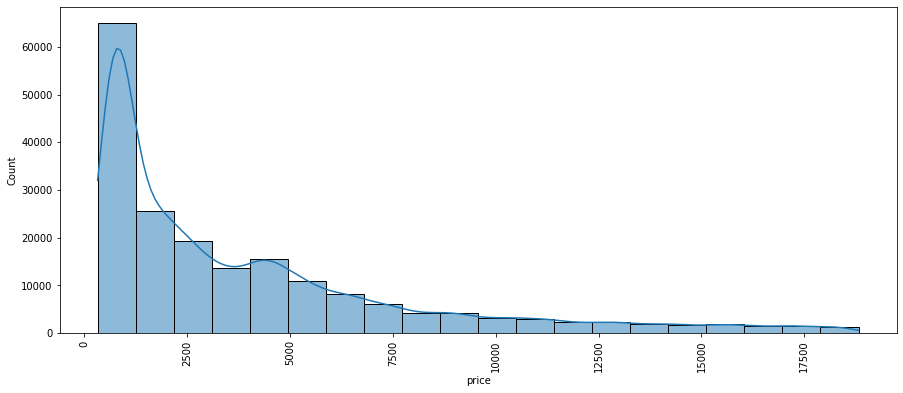

In [42]:
plt.figure(figsize=(15,6))
sns.histplot(df['price'], kde = True, bins = 20, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

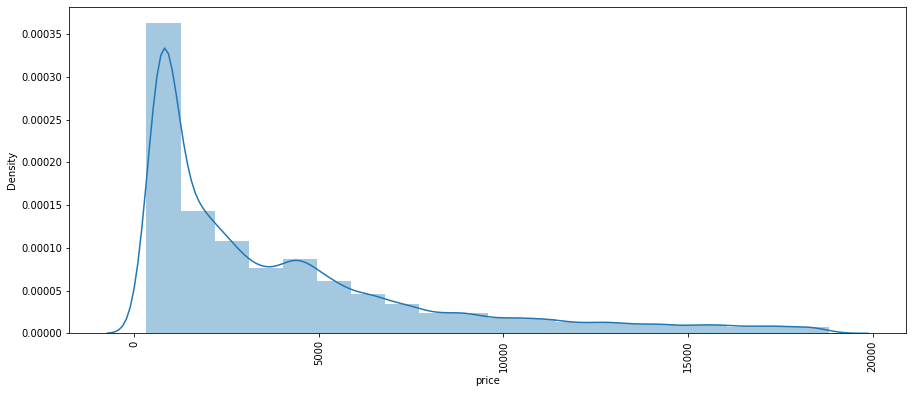

In [43]:
plt.figure(figsize=(15,6))
sns.distplot(df['price'], kde = True, bins = 20)
plt.xticks(rotation = 90)
plt.show()

In [44]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [45]:
numeric_df

carat  depth  table     x     y     z  price
0        1.52   62.2   58.0  7.27  7.33  4.55  13619
1        2.03   62.0   58.0  8.06  8.12  5.05  13387
2        0.70   61.2   57.0  5.69  5.73  3.50   2772
3        0.32   61.6   56.0  4.38  4.41  2.71    666
4        1.70   62.6   59.0  7.65  7.61  4.77  14453
...       ...    ...    ...   ...   ...   ...    ...
193568   0.31   61.1   56.0  4.35  4.39  2.67   1130
193569   0.70   60.3   58.0  5.75  5.77  3.47   2874
193570   0.73   63.1   57.0  5.72  5.75  3.62   3036
193571   0.34   62.9   55.0  4.45  4.49  2.81    681
193572   0.71   60.8   64.0  5.73  5.71  3.48   2258

[193573 rows x 7 columns]

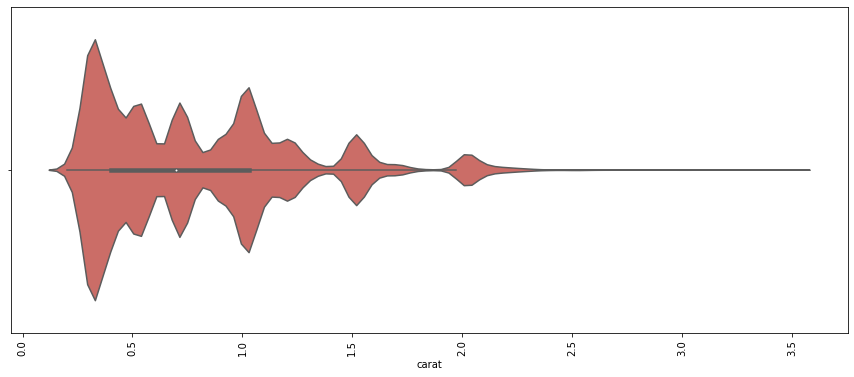

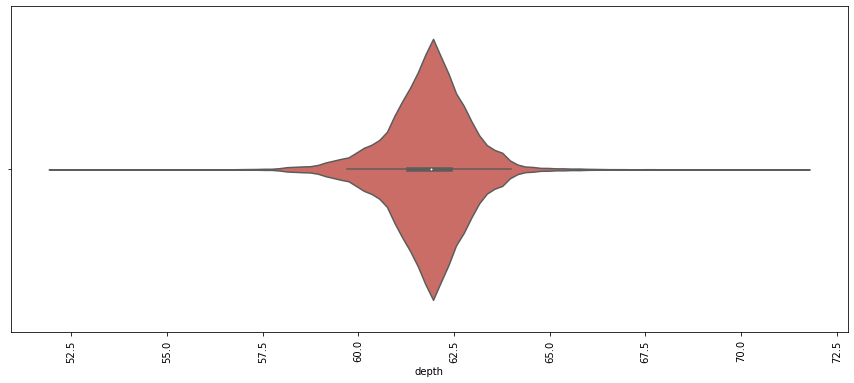

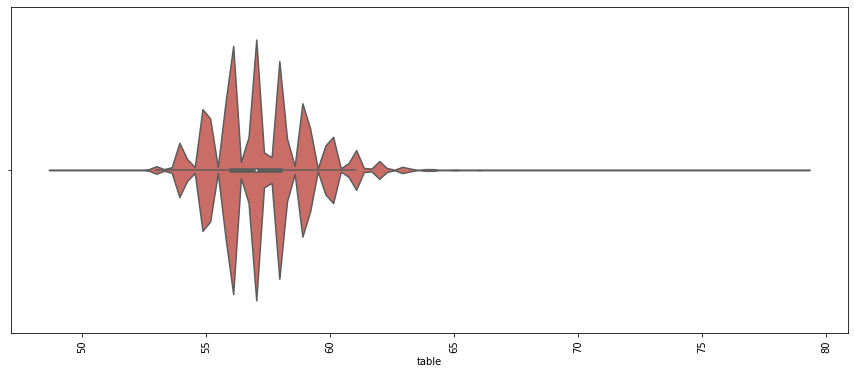

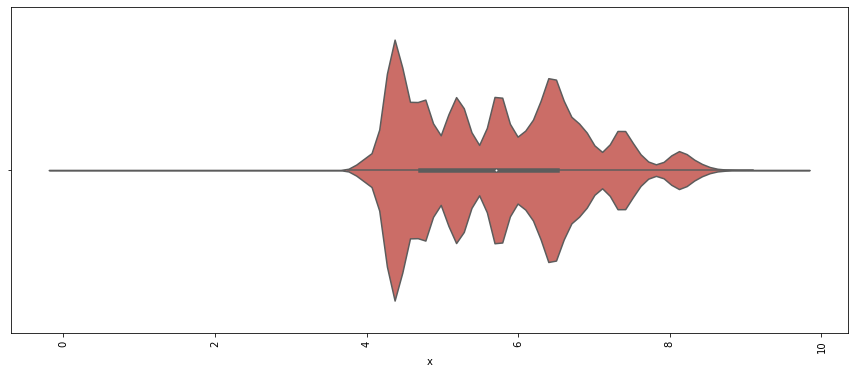

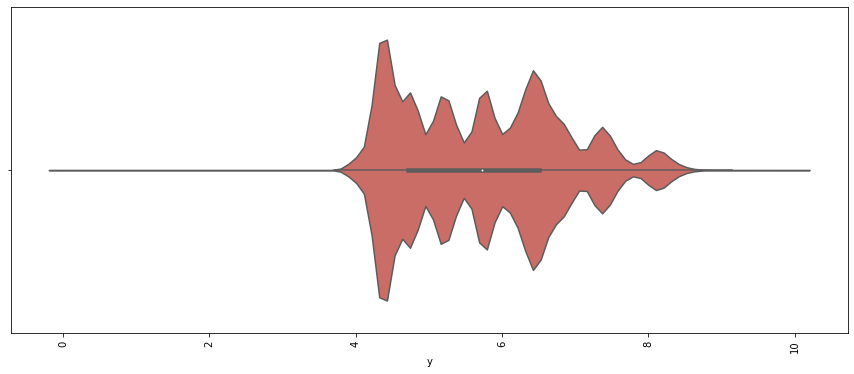

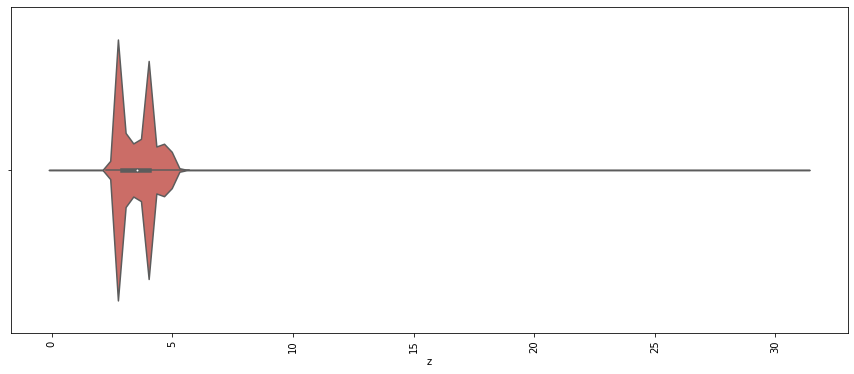

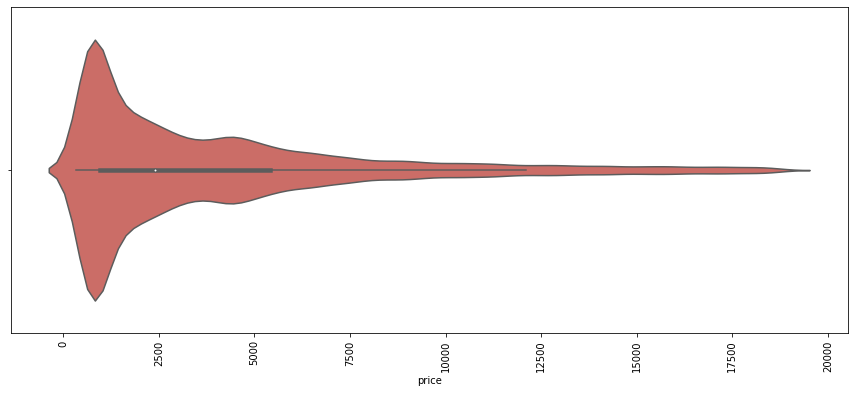

In [46]:
for i in numeric_df.columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(numeric_df[i], palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

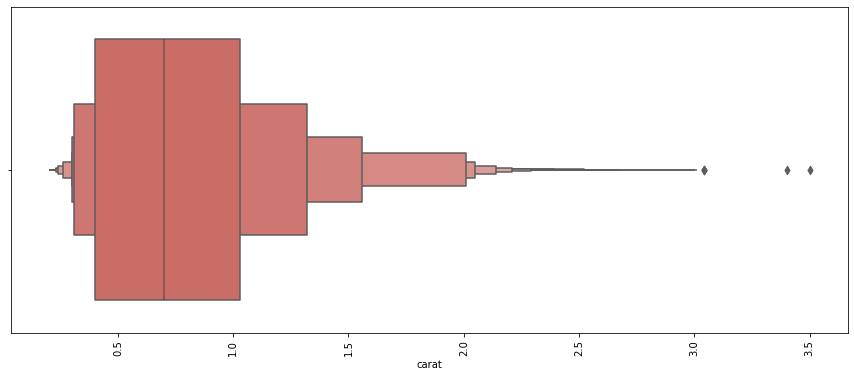

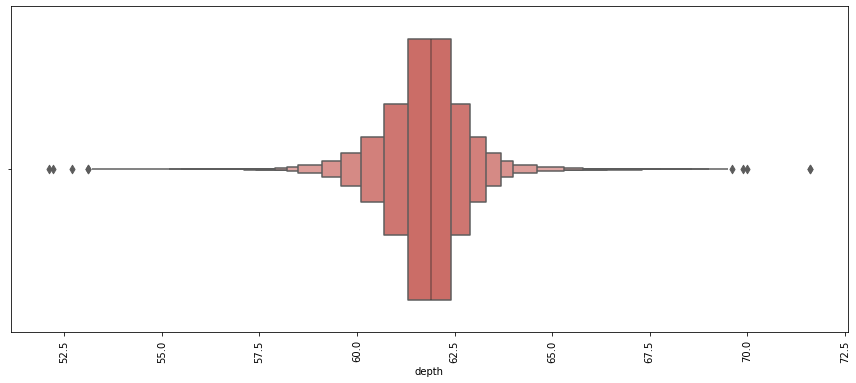

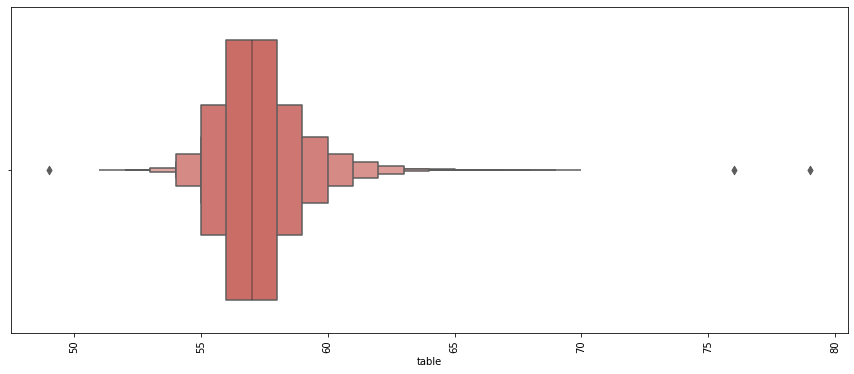

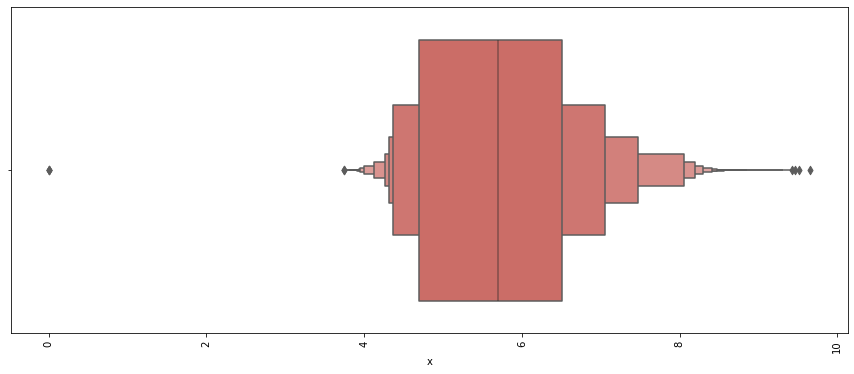

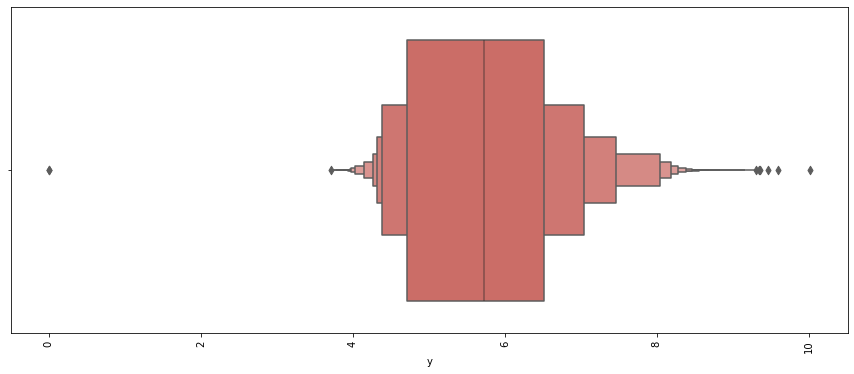

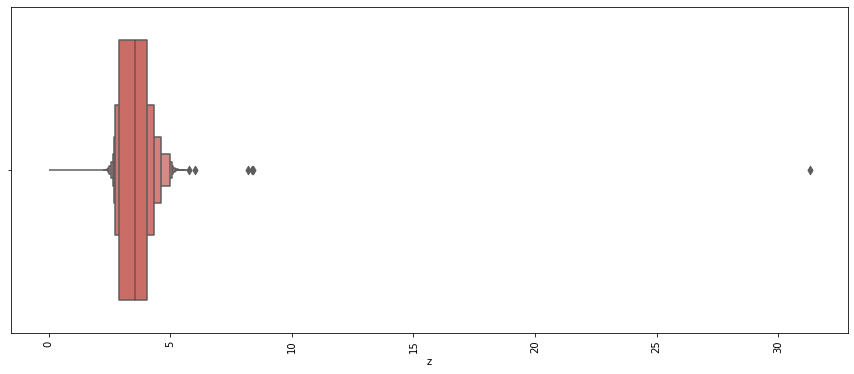

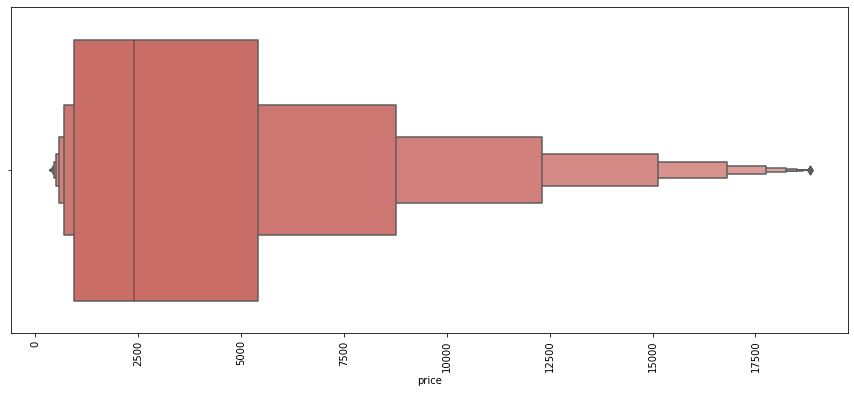

In [47]:
for i in numeric_df.columns:
    plt.figure(figsize=(15,6))
    sns.boxenplot(numeric_df[i], palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

### BOXPLOT FOR DETECING OUTLIERS

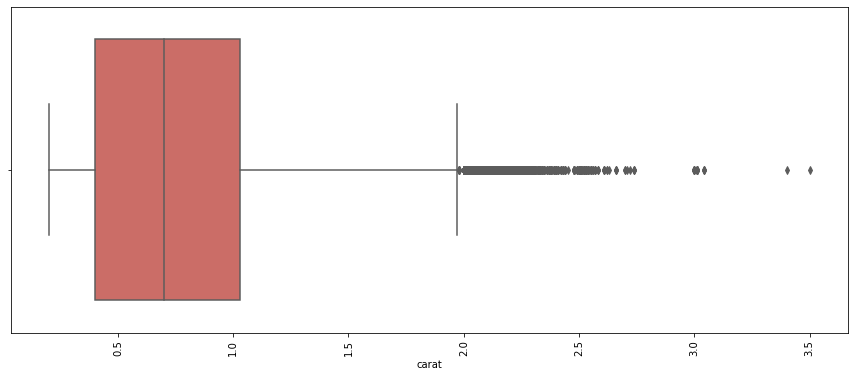

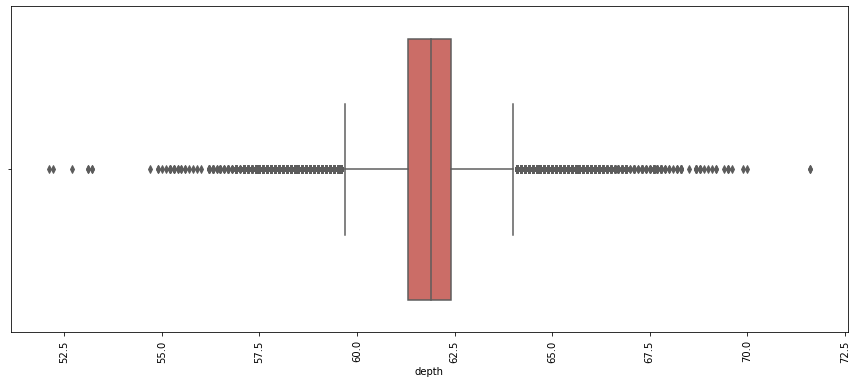

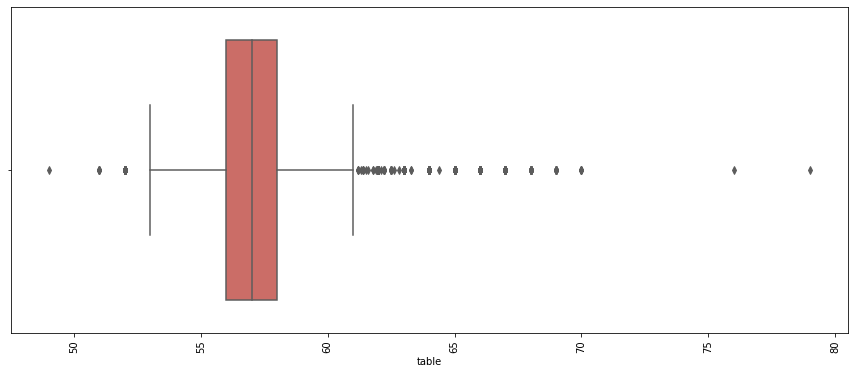

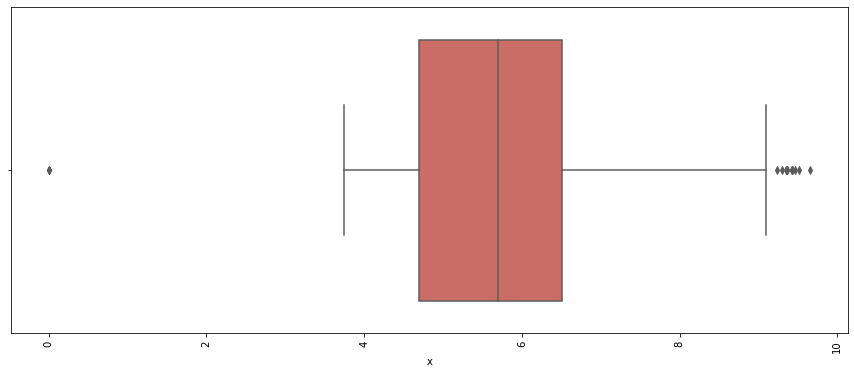

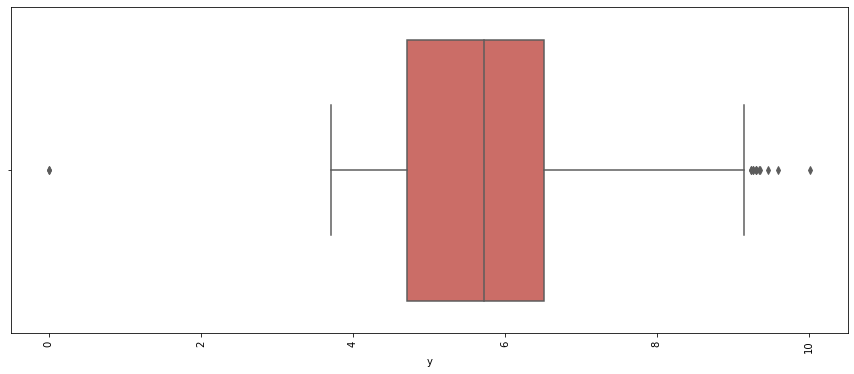

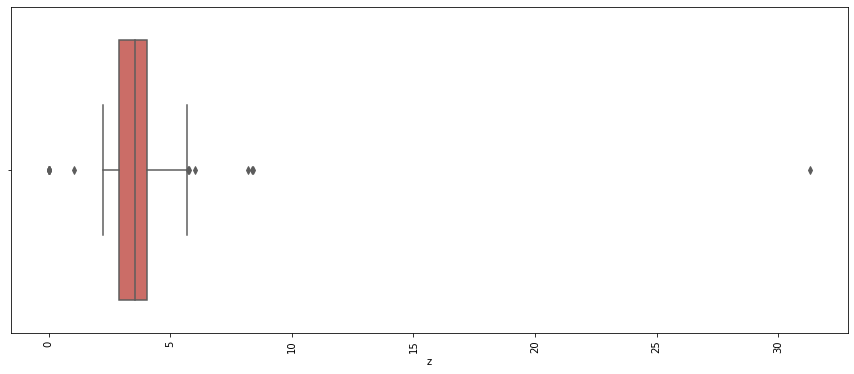

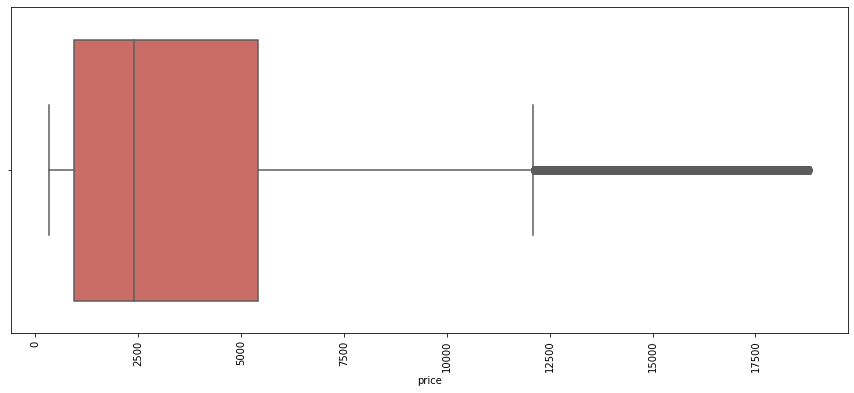

In [48]:
for i in numeric_df.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(numeric_df[i], palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

### BIVARITE ANALYSIS

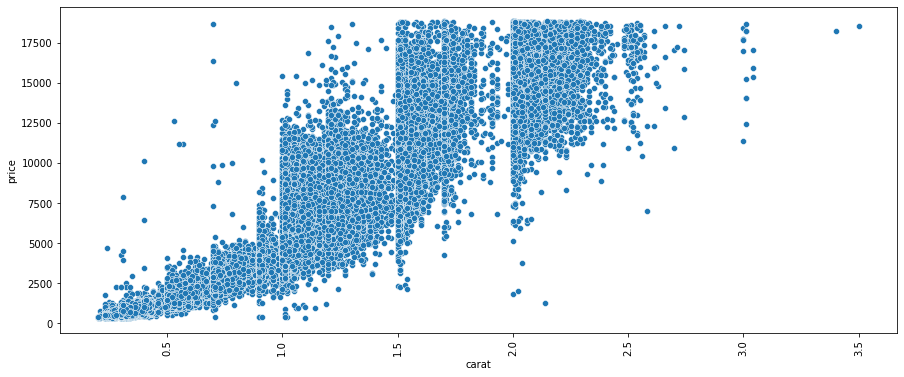

In [49]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['carat'], y = df['price'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

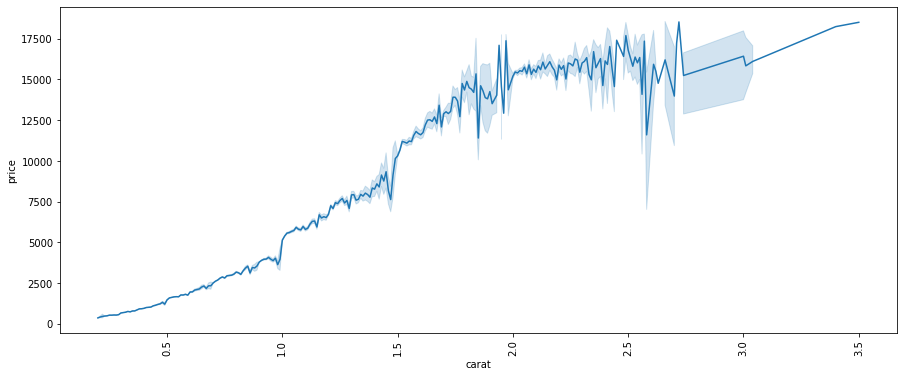

In [50]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['carat'], y = df['price'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

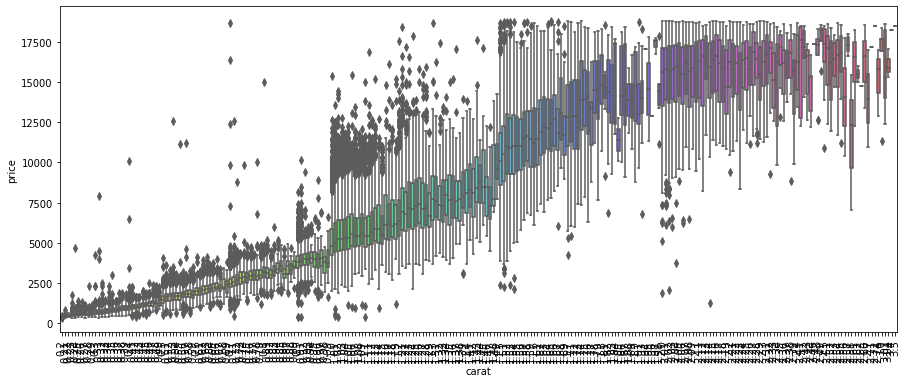

In [51]:
plt.figure(figsize=(15,6))
sns.boxplot(x = df['carat'], y = df['price'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

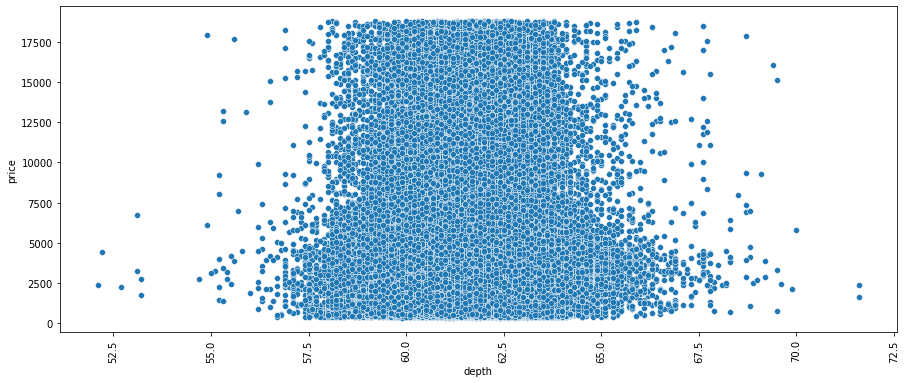

In [52]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['depth'], y = df['price'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

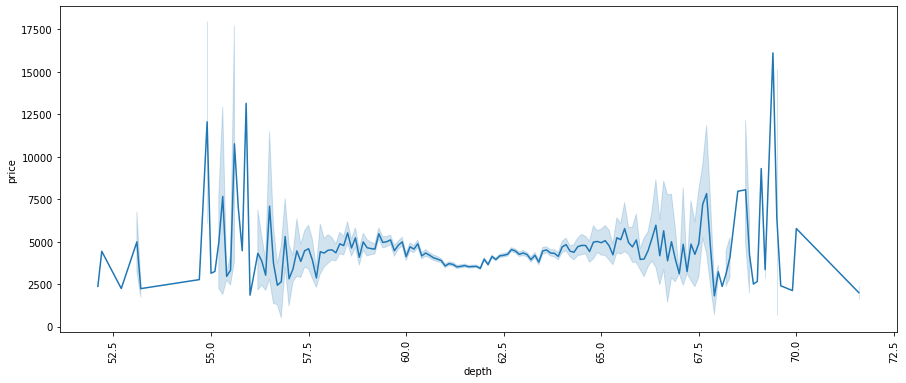

In [53]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['depth'], y = df['price'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

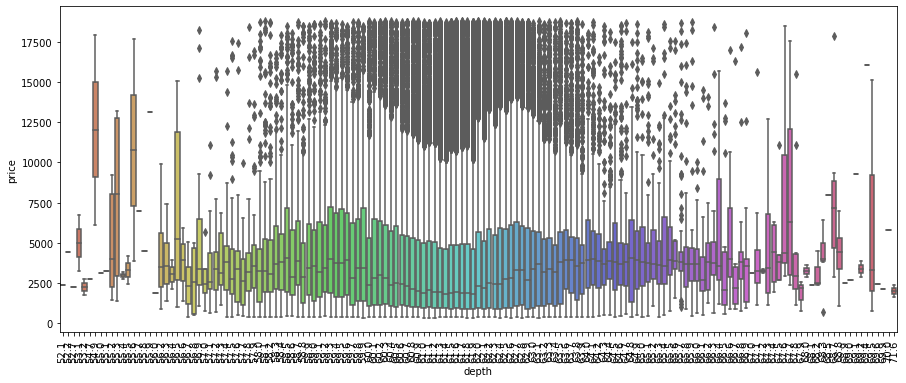

In [54]:
plt.figure(figsize=(15,6))
sns.boxplot(x = df['depth'], y = df['price'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

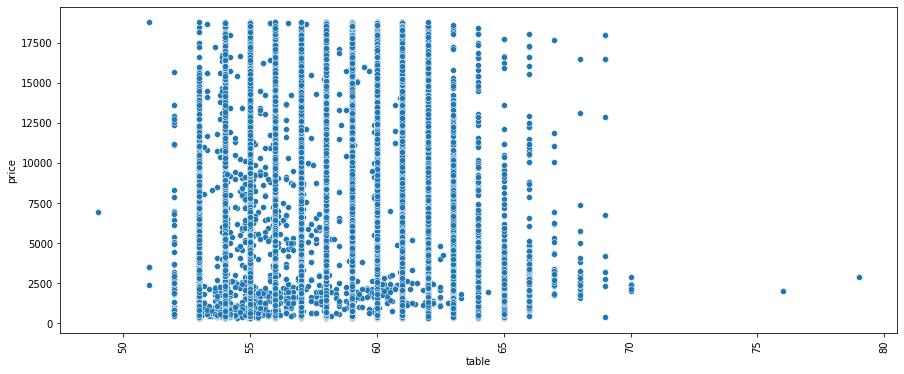

In [55]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['table'], y = df['price'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

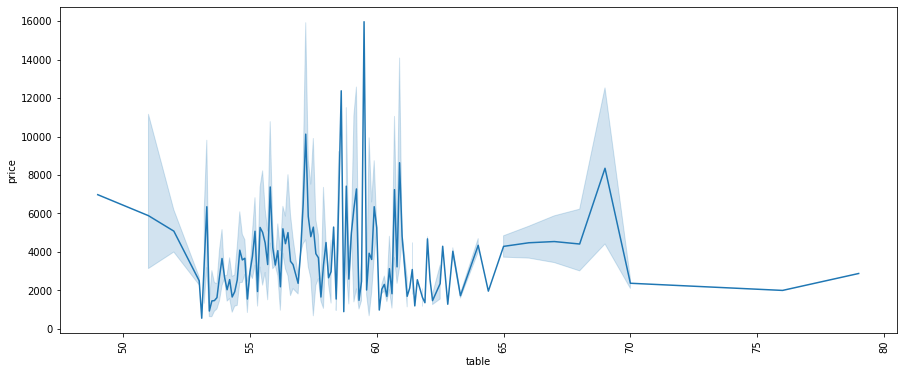

In [56]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['table'], y = df['price'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

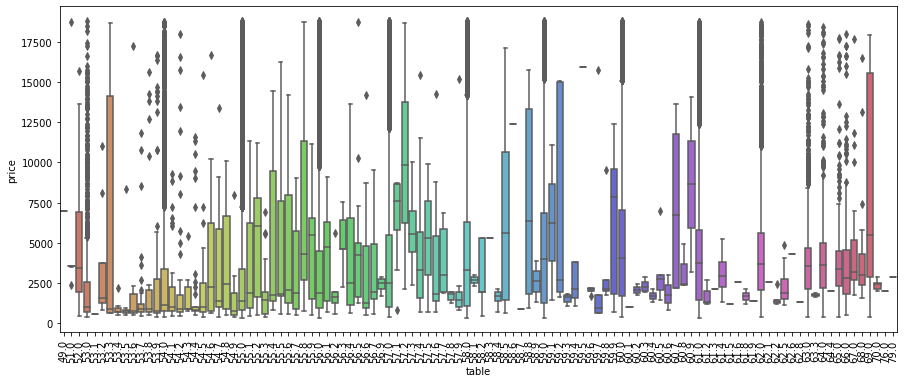

In [57]:
plt.figure(figsize=(15,6))
sns.boxplot(x = df['table'], y = df['price'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

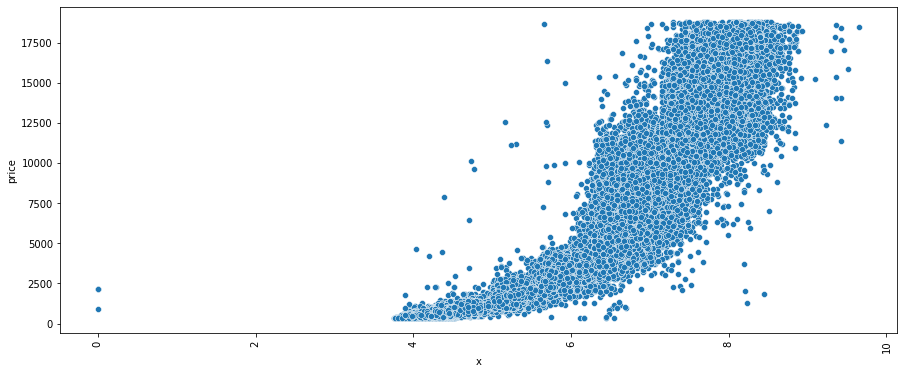

In [58]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['x'], y = df['price'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

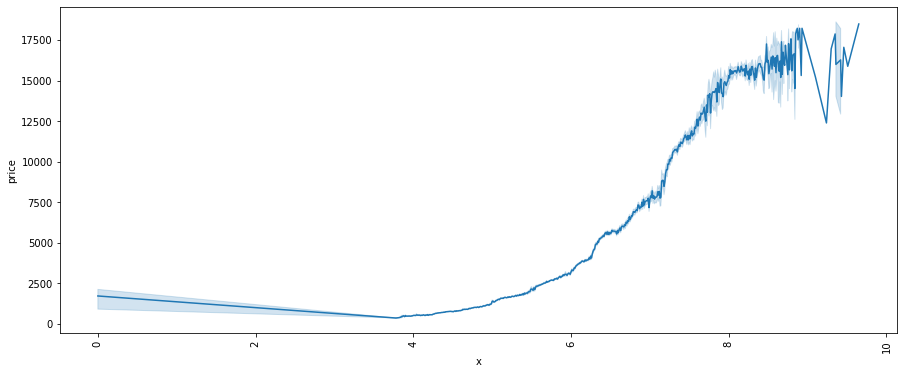

In [59]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['x'], y = df['price'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

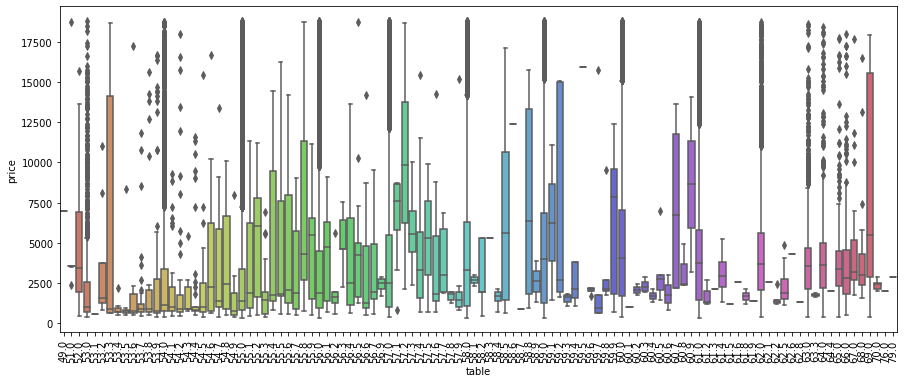

In [60]:
plt.figure(figsize=(15,6))
sns.boxplot(x = df['table'], y = df['price'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

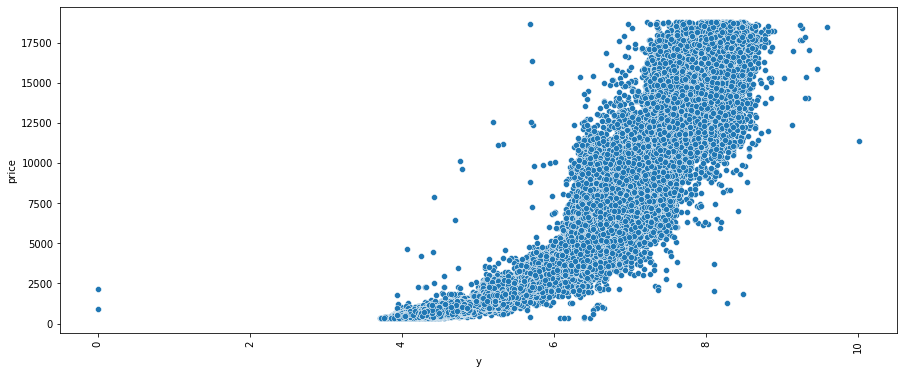

In [61]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['y'], y = df['price'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

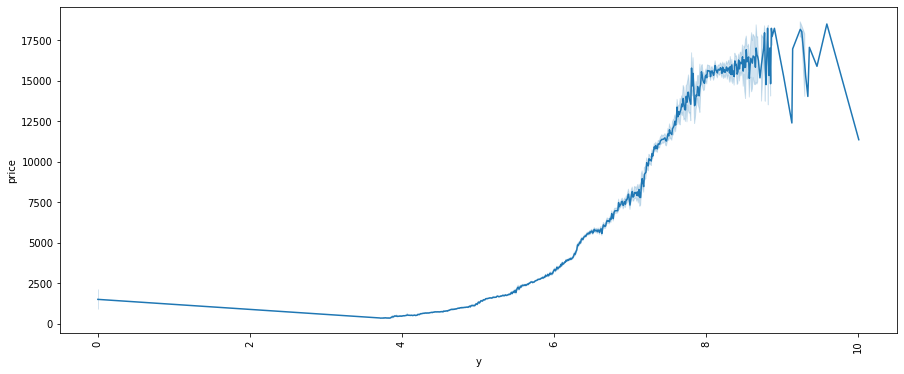

In [62]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['y'], y = df['price'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

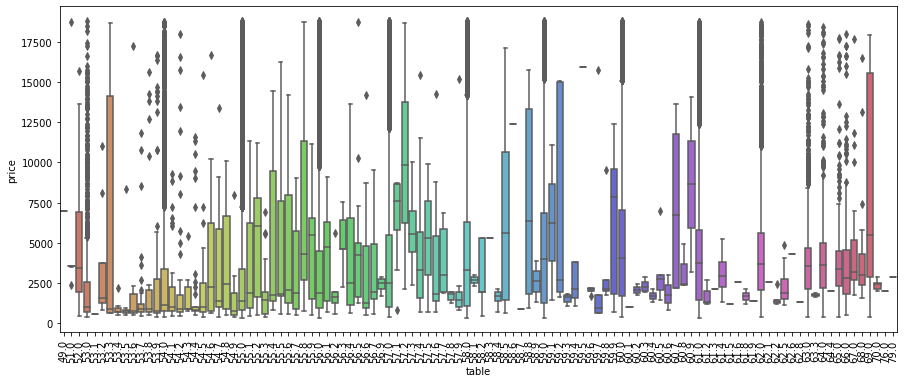

In [63]:
plt.figure(figsize=(15,6))
sns.boxplot(x = df['table'], y = df['price'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

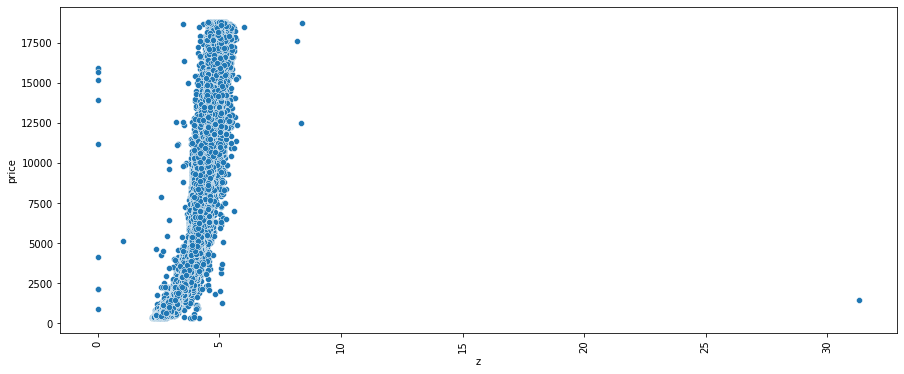

In [64]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['z'], y = df['price'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

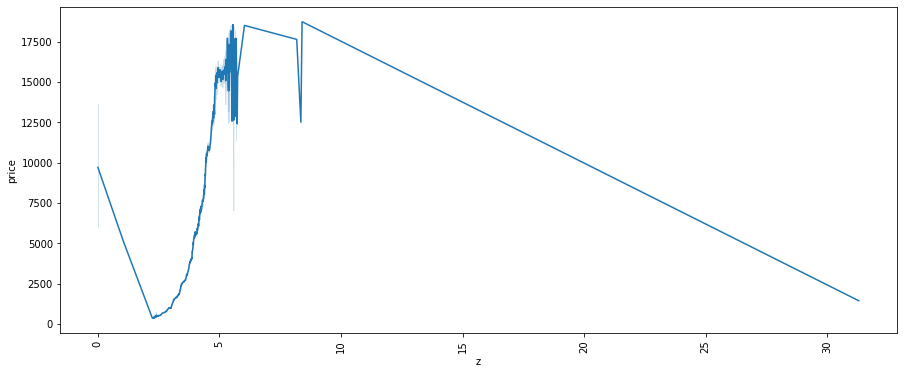

In [65]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['z'], y = df['price'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

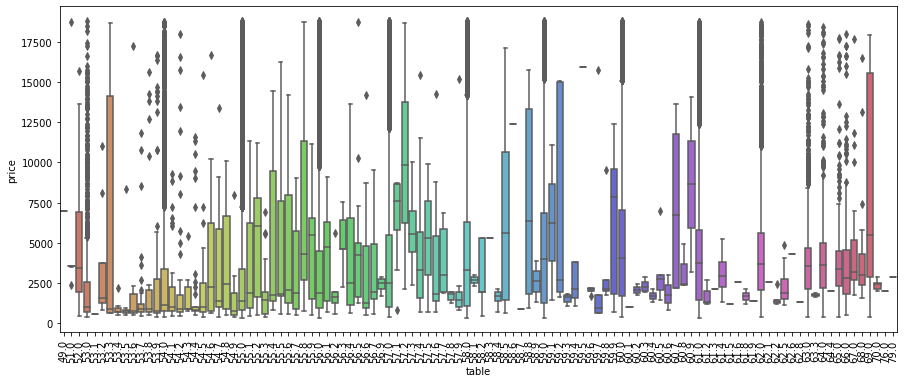

In [66]:
plt.figure(figsize=(15,6))
sns.boxplot(x = df['table'], y = df['price'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

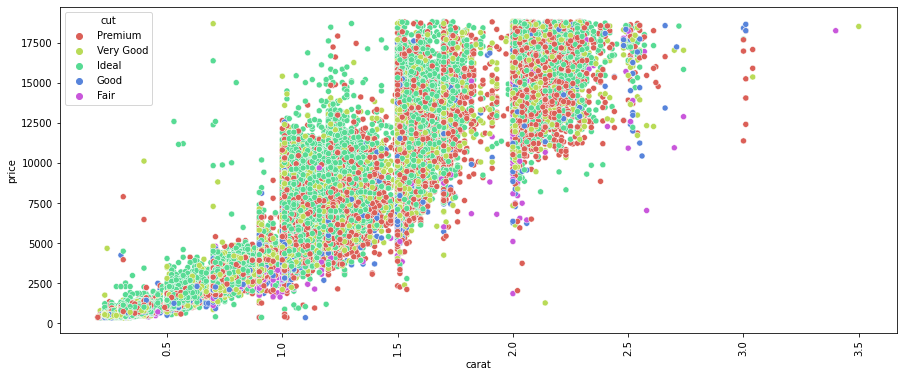

In [67]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['carat'], y = df['price'], hue = df['cut'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

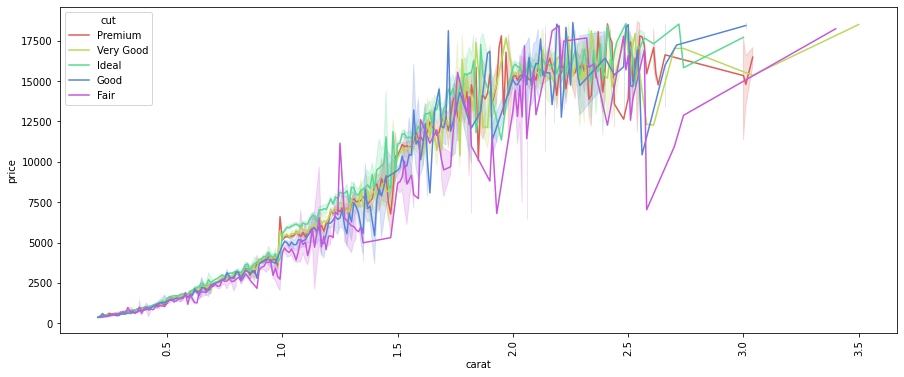

In [68]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['carat'], y = df['price'], hue = df['cut'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

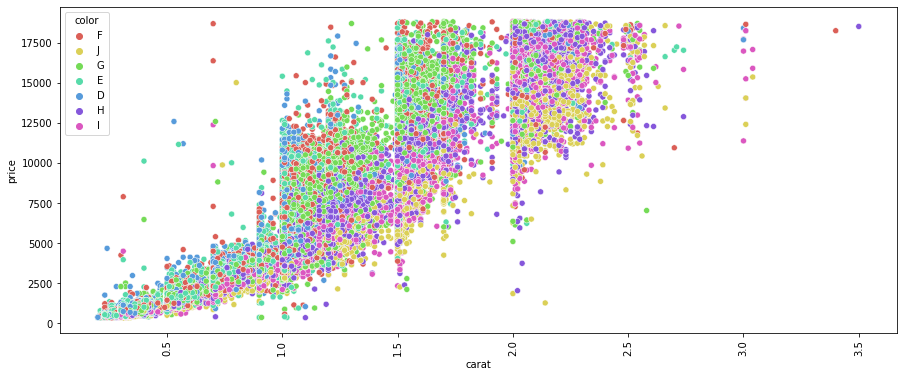

In [69]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['carat'], y = df['price'], hue = df['color'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

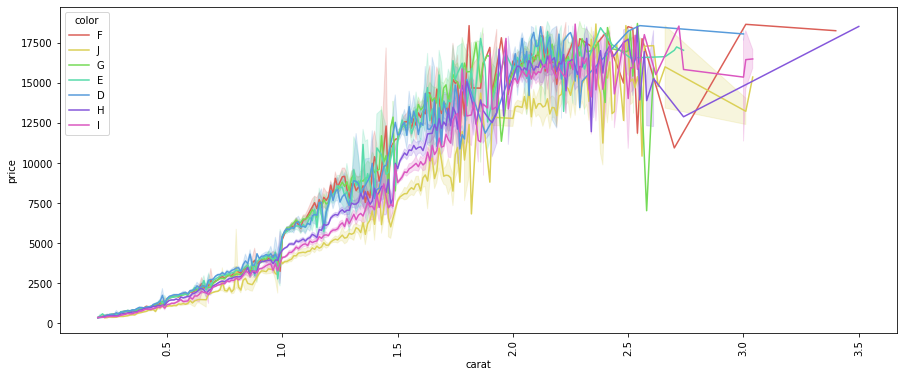

In [70]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['carat'], y = df['price'], hue = df['color'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

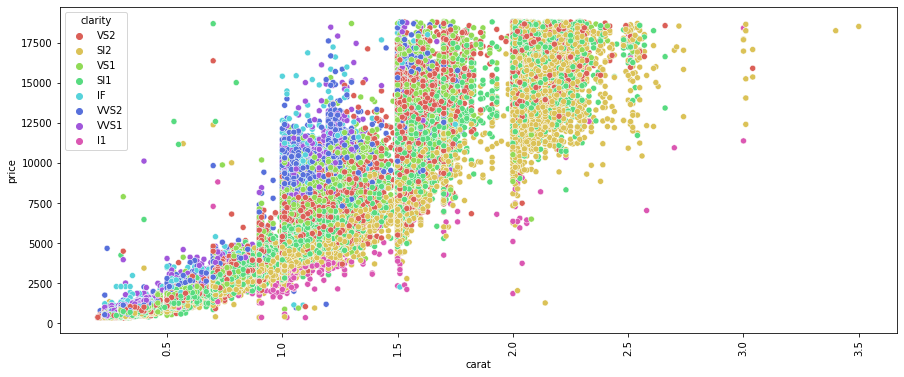

In [71]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['carat'], y = df['price'], hue = df['clarity'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

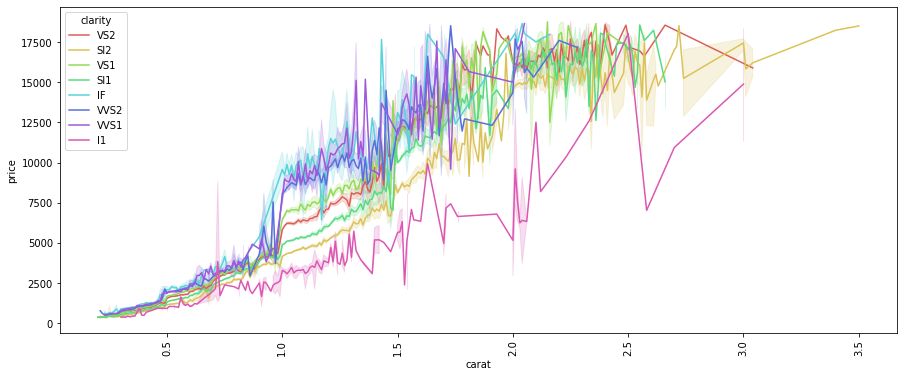

In [72]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['carat'], y = df['price'], hue = df['clarity'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

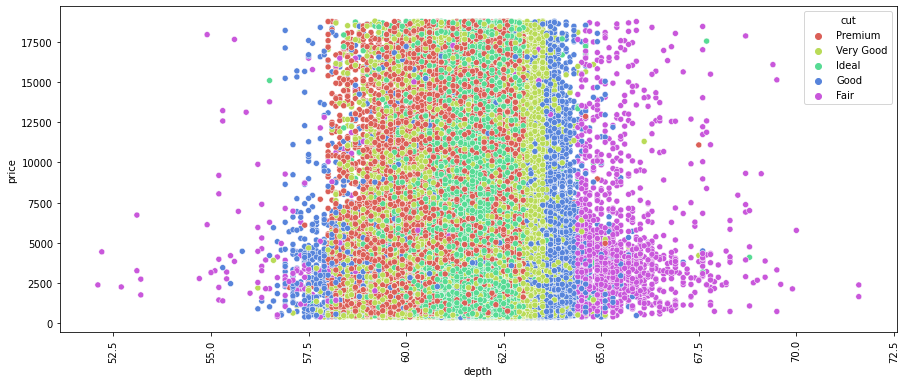

In [73]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['depth'], y = df['price'], hue = df['cut'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

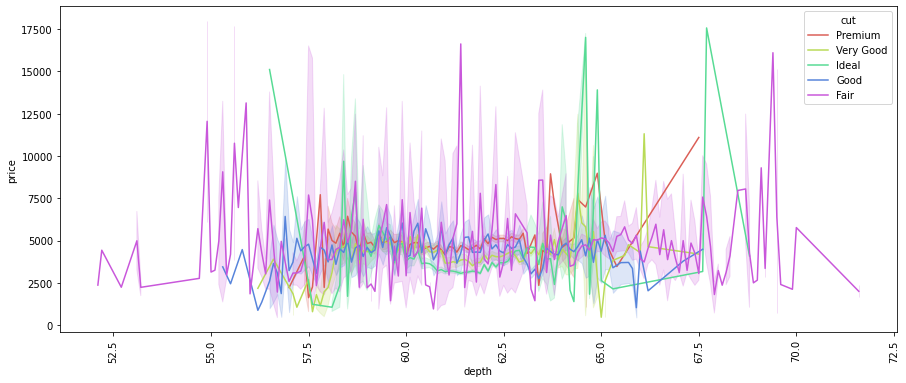

In [74]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['depth'], y = df['price'], hue = df['cut'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

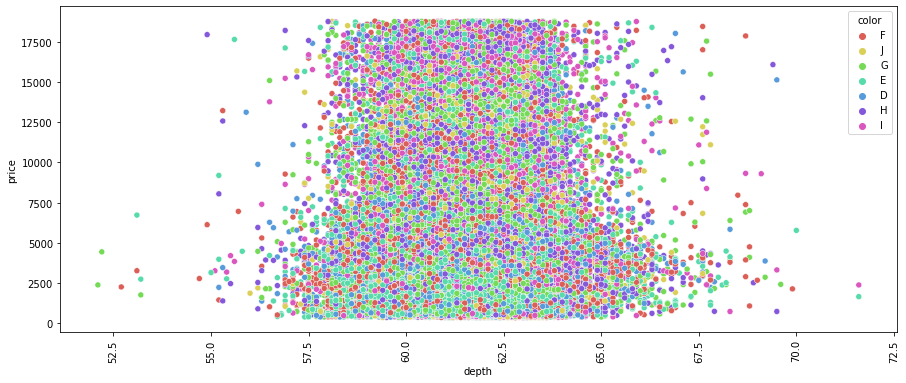

In [75]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['depth'], y = df['price'], hue = df['color'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

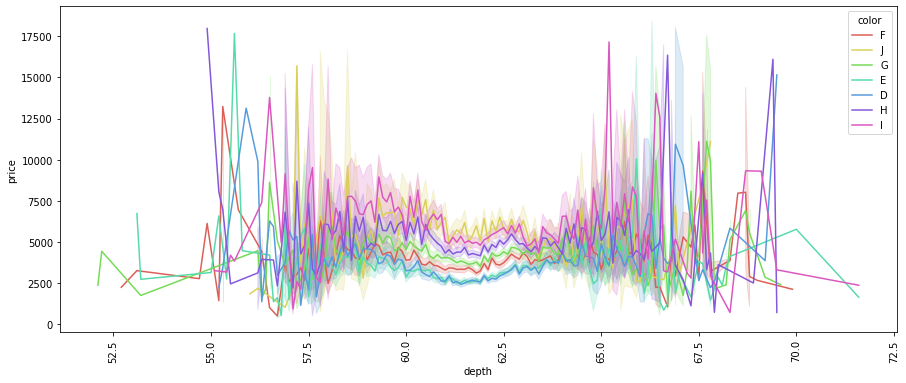

In [76]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['depth'], y = df['price'], hue = df['color'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

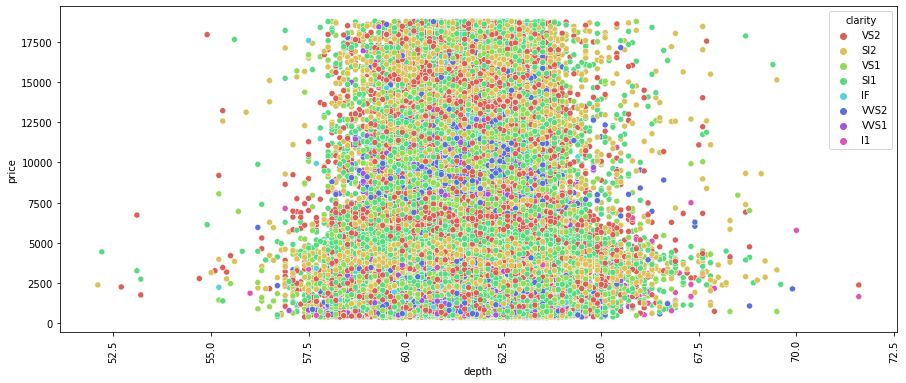

In [77]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['depth'], y = df['price'], hue = df['clarity'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

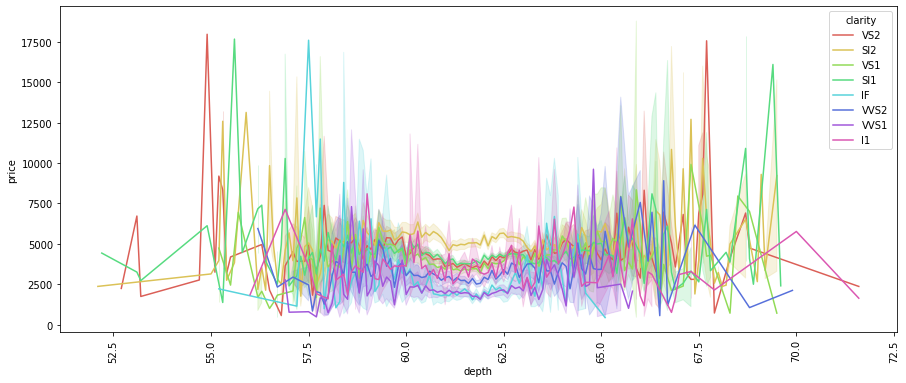

In [78]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['depth'], y = df['price'], hue = df['clarity'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

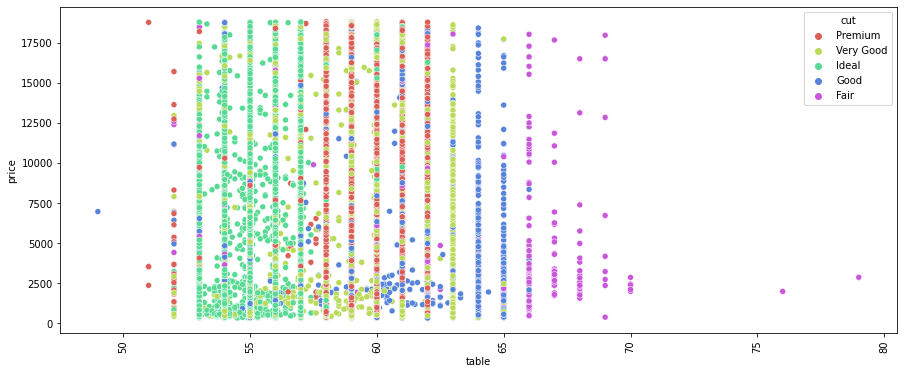

In [79]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['table'], y = df['price'], hue = df['cut'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

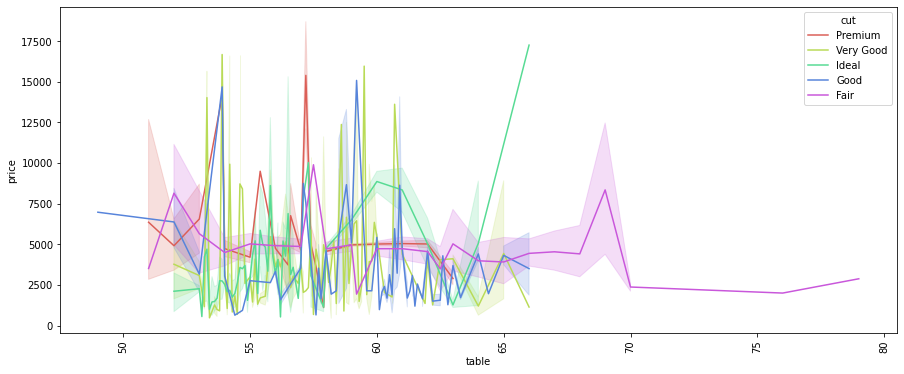

In [80]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['table'], y = df['price'], hue = df['cut'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

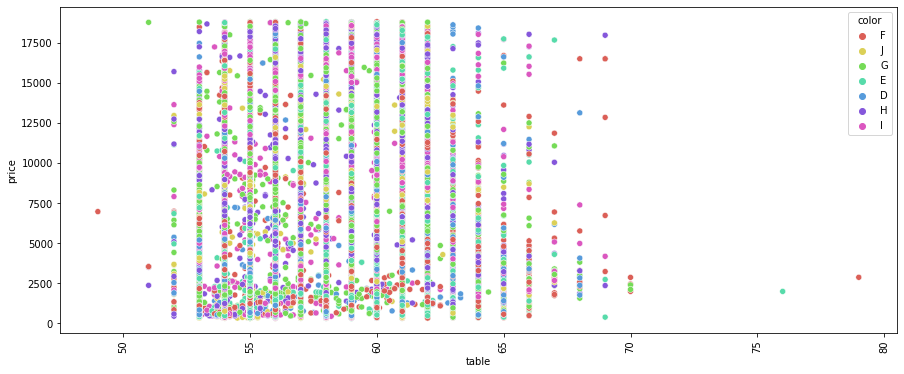

In [81]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['table'], y = df['price'], hue = df['color'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

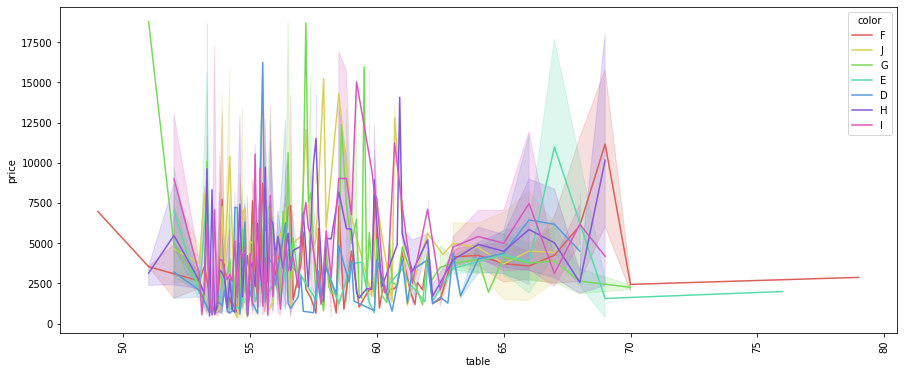

In [82]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['table'], y = df['price'], hue = df['color'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

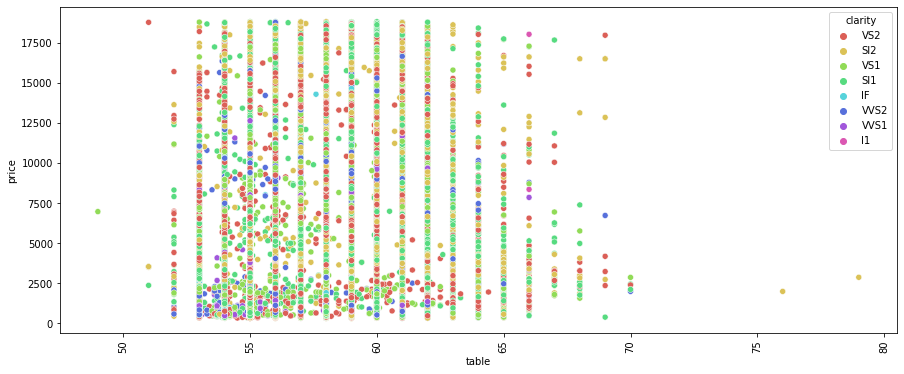

In [83]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['table'], y = df['price'], hue = df['clarity'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

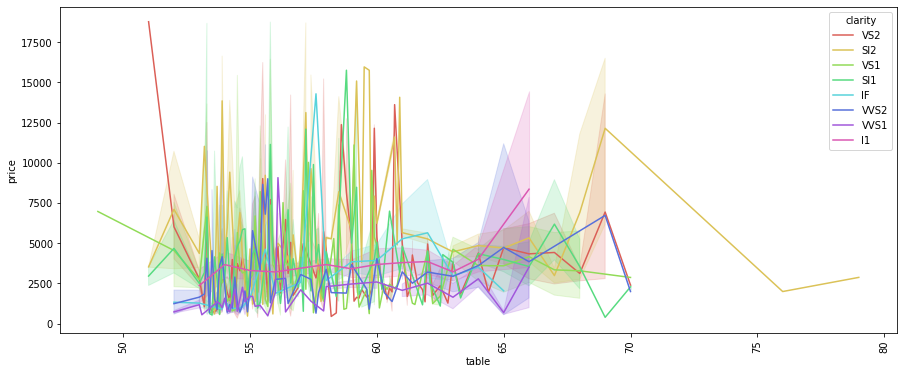

In [84]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['table'], y = df['price'], hue = df['clarity'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

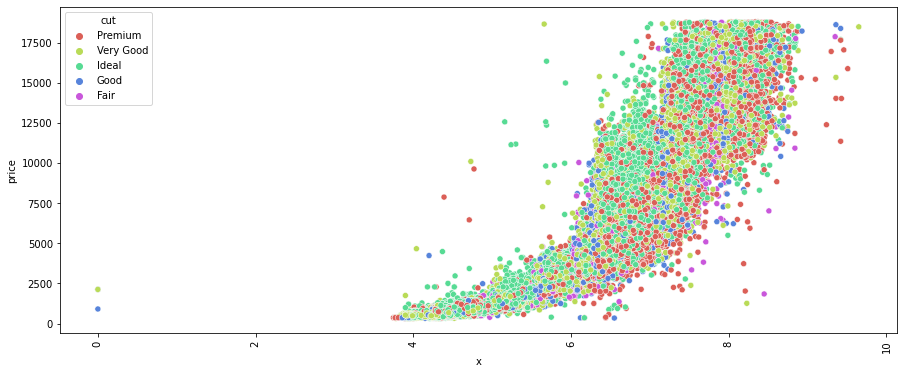

In [85]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['x'], y = df['price'], hue = df['cut'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

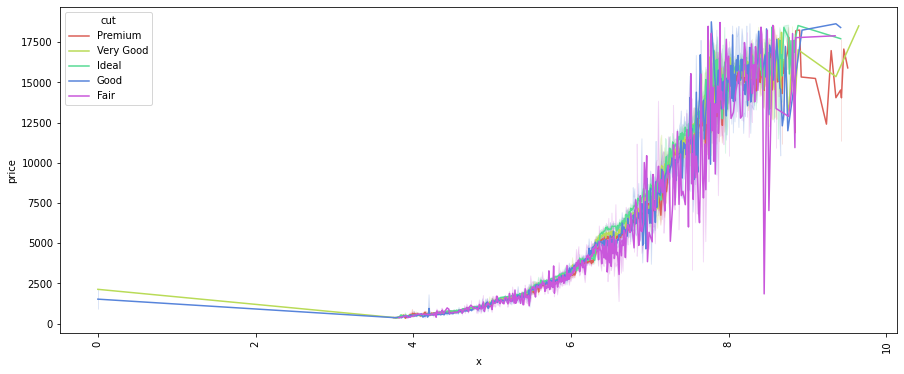

In [86]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['x'], y = df['price'], hue = df['cut'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

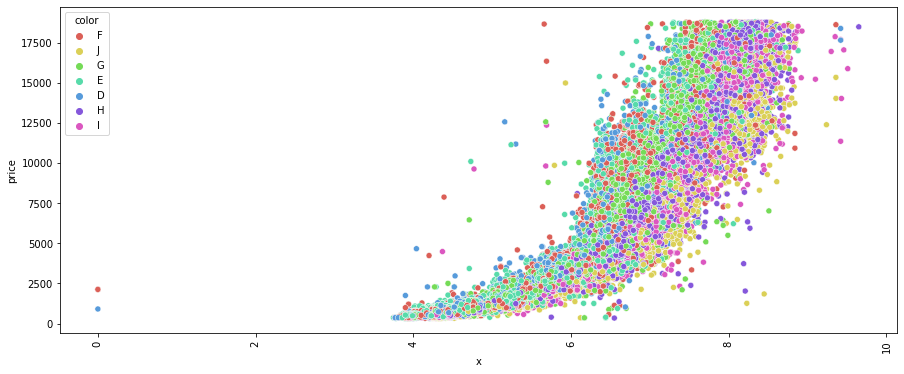

In [87]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['x'], y = df['price'], hue = df['color'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

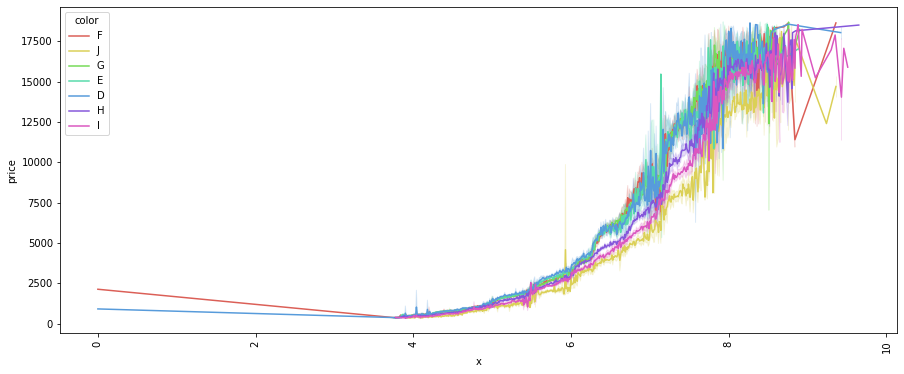

In [88]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['x'], y = df['price'], hue = df['color'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

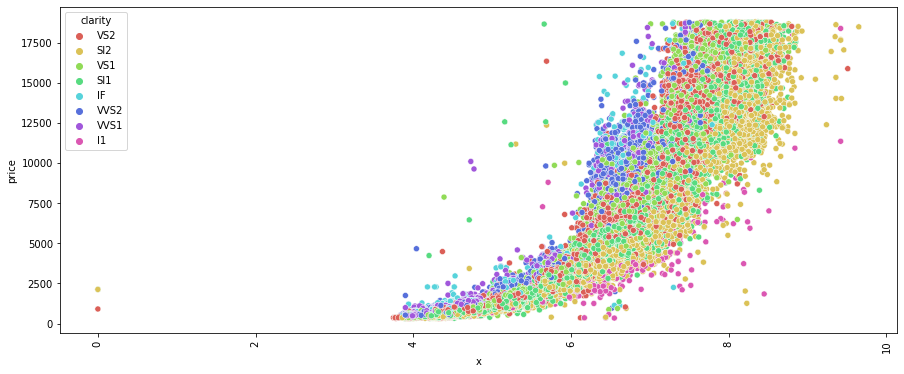

In [89]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['x'], y = df['price'], hue = df['clarity'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

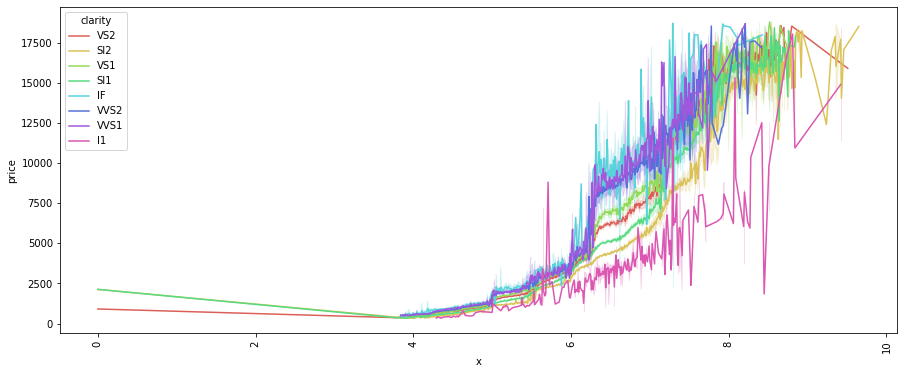

In [90]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['x'], y = df['price'], hue = df['clarity'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

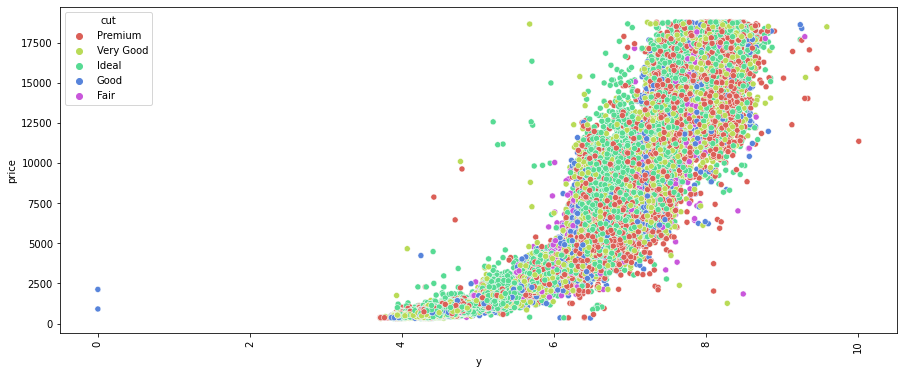

In [91]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['y'], y = df['price'], hue = df['cut'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

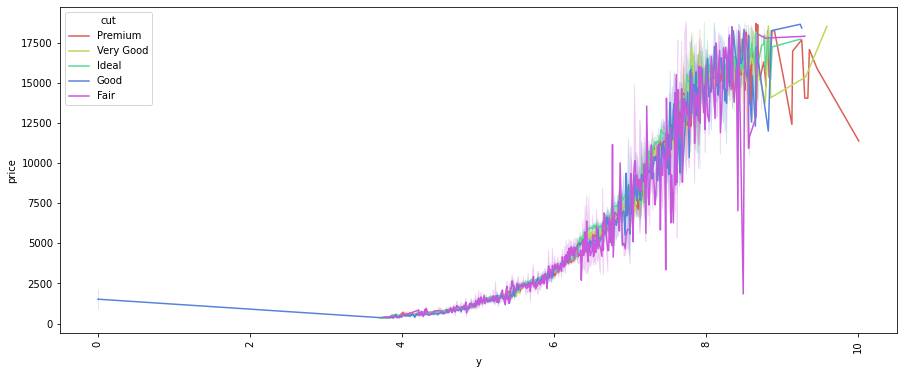

In [92]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['y'], y = df['price'], hue = df['cut'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

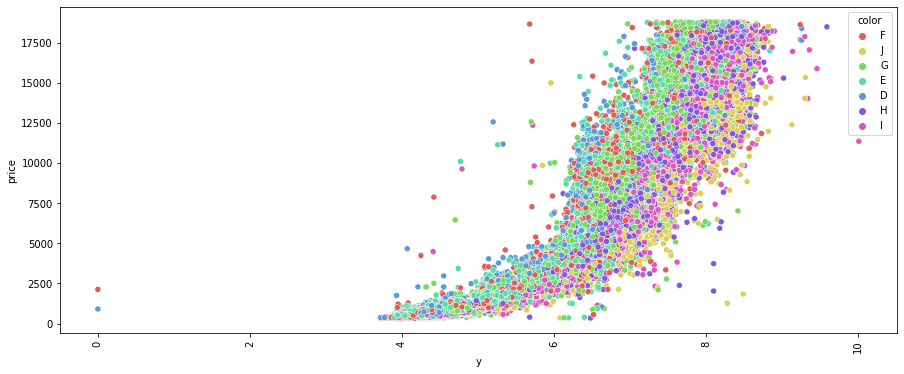

In [93]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['y'], y = df['price'], hue = df['color'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

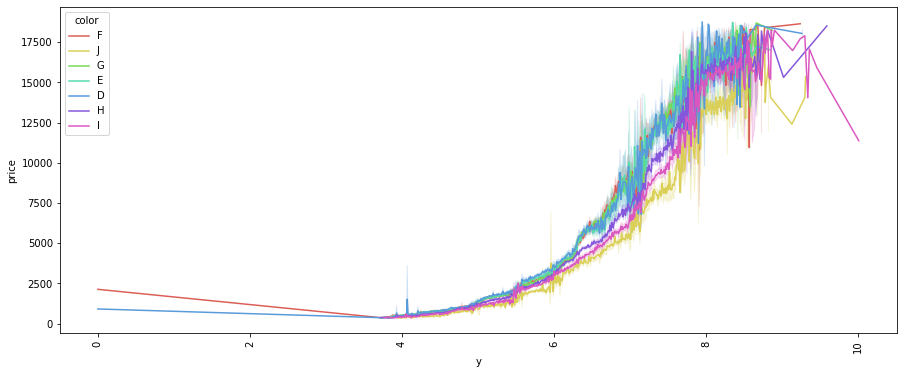

In [94]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['y'], y = df['price'], hue = df['color'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

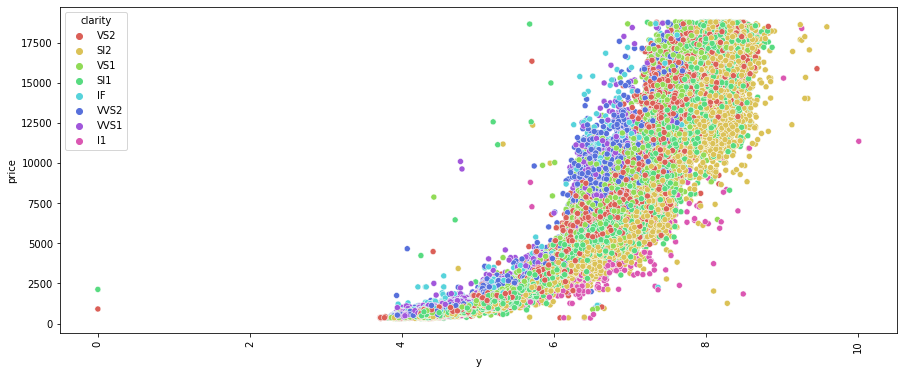

In [95]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['y'], y = df['price'], hue = df['clarity'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

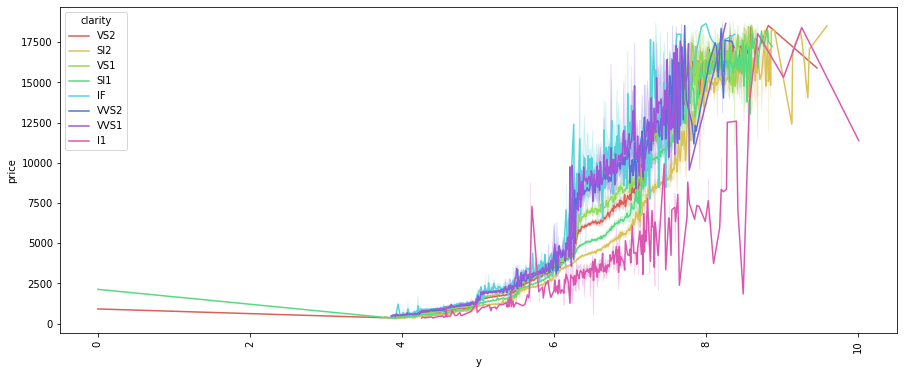

In [96]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['y'], y = df['price'], hue = df['clarity'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

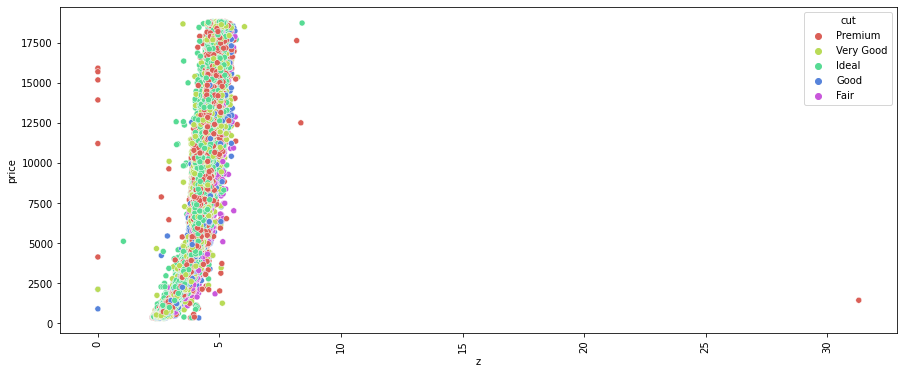

In [97]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['z'], y = df['price'], hue = df['cut'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

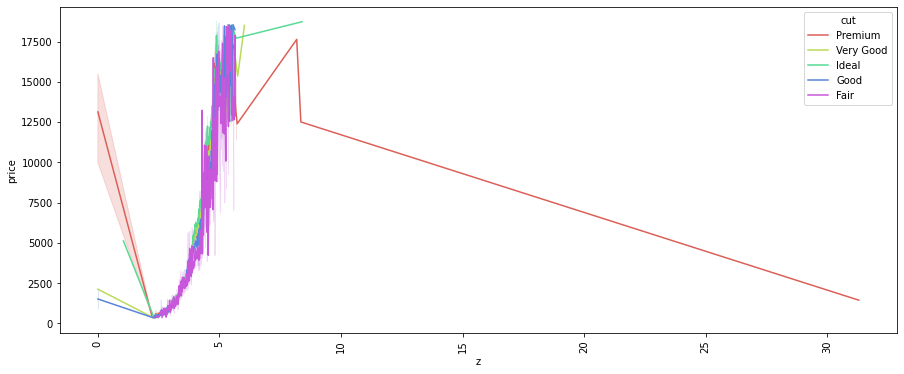

In [98]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['z'], y = df['price'], hue = df['cut'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

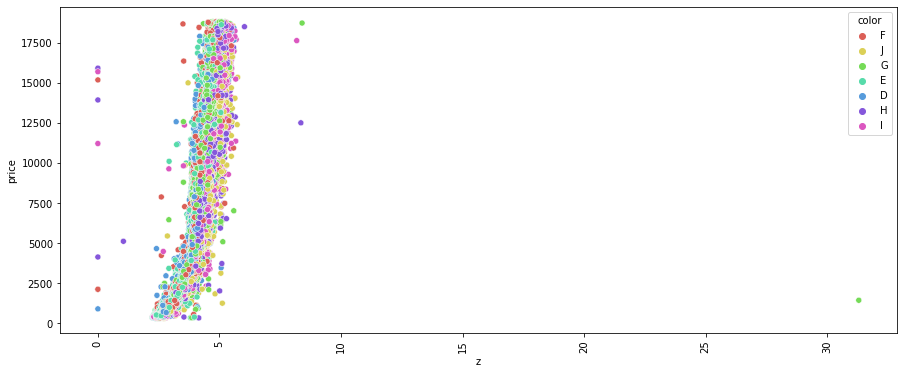

In [99]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['z'], y = df['price'], hue = df['color'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

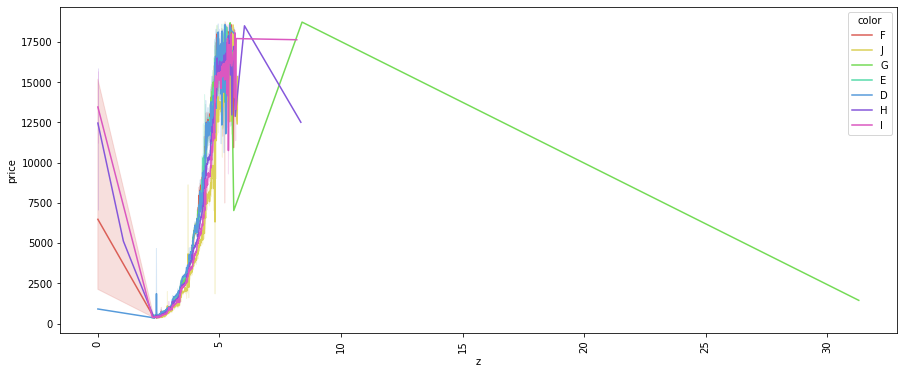

In [100]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['z'], y = df['price'], hue = df['color'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

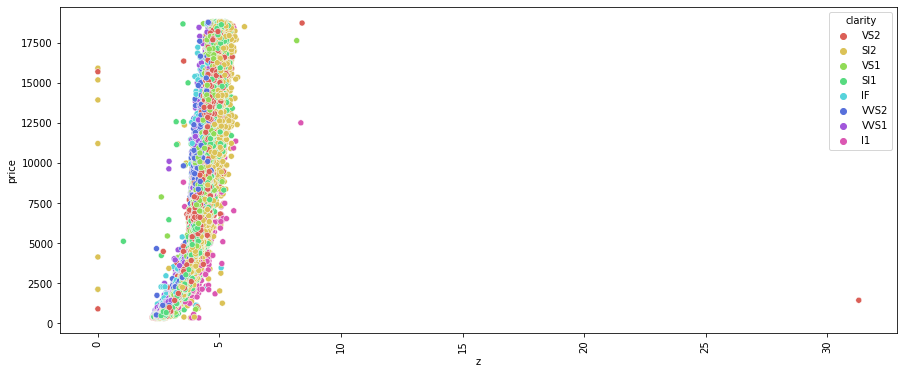

In [101]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['z'], y = df['price'], hue = df['clarity'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

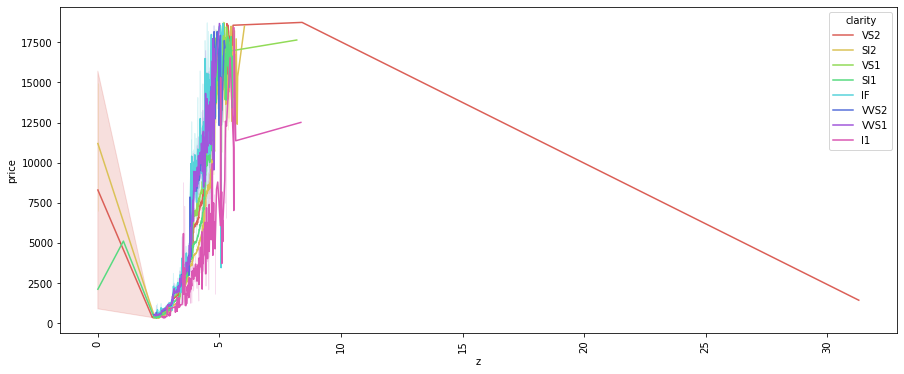

In [102]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['z'], y = df['price'], hue = df['clarity'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
object_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in object_cols:
    df[col] = le.fit_transform(df[col])

In [105]:
df

carat  cut  color  clarity  depth  table     x     y     z  price
0        1.52    3      2        5   62.2   58.0  7.27  7.33  4.55  13619
1        2.03    4      6        3   62.0   58.0  8.06  8.12  5.05  13387
2        0.70    2      3        4   61.2   57.0  5.69  5.73  3.50   2772
3        0.32    2      3        4   61.6   56.0  4.38  4.41  2.71    666
4        1.70    3      3        5   62.6   59.0  7.65  7.61  4.77  14453
...       ...  ...    ...      ...    ...    ...   ...   ...   ...    ...
193568   0.31    2      0        7   61.1   56.0  4.35  4.39  2.67   1130
193569   0.70    3      3        7   60.3   58.0  5.75  5.77  3.47   2874
193570   0.73    4      2        2   63.1   57.0  5.72  5.75  3.62   3036
193571   0.34    4      0        2   62.9   55.0  4.45  4.49  2.81    681
193572   0.71    1      1        3   60.8   64.0  5.73  5.71  3.48   2258

[193573 rows x 10 columns]

In [106]:
df['cut'].unique()

array([3, 4, 2, 1, 0])

In [107]:
#Once we’ve encoded the ordinal variables, let’s get rid of any outliers and/or nonsense data.
#First, any observations with an X,Y, or Z dimension of 0 are removed.

In [108]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

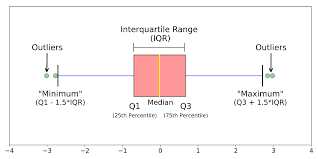

In [109]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

carat         0.63
cut           1.00
color         3.00
clarity       3.00
depth         1.10
table         2.00
x             1.81
y             1.80
z             1.13
price      4457.50
dtype: float64


In [110]:
df_new = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [111]:
df_new.shape

(168646, 10)

In [112]:
df.shape

(193563, 10)

In [113]:
# we’ll cut the dataset down to the 99th percentile based on a few different variables to get rid of the most egregious 
# outliers. This is by no means a nuanced approach to handling outliers and a lot more effort would be put into this portion 
# of the work in a real-world scenario.

In [114]:
df = df[df['depth'] < df['depth'].quantile(0.99)]
df = df[df['table'] < df['table'].quantile(0.99)]
df = df[df['x'] < df['x'].quantile(0.99)]
df = df[df['y'] < df['y'].quantile(0.99)]
df = df[df['z'] < df['z'].quantile(0.99)]

In [115]:
df_corr = df.corr()

In [116]:
df_corr

carat       cut     color   clarity     depth     table         x  \
carat    1.000000  0.103085  0.242231 -0.193428  0.032269  0.228648  0.985096   
cut      0.103085  1.000000  0.018712 -0.048792 -0.048882  0.396600  0.099412   
color    0.242231  0.018712  1.000000  0.030847  0.039859  0.025876  0.222926   
clarity -0.193428 -0.048792  0.030847  1.000000 -0.048311 -0.092867 -0.213067   
depth    0.032269 -0.048882  0.039859 -0.048311  1.000000 -0.199191 -0.008572   
table    0.228648  0.396600  0.025876 -0.092867 -0.199191  1.000000  0.232246   
x        0.985096  0.099412  0.222926 -0.213067 -0.008572  0.232246  1.000000   
y        0.984636  0.099936  0.223057 -0.212430 -0.008189  0.227347  0.999148   
z        0.984711  0.094783  0.225534 -0.216115  0.080256  0.211965  0.995567   
price    0.931112  0.077381  0.151136 -0.059071  0.009325  0.177726  0.891314   

                y         z     price  
carat    0.984636  0.984711  0.931112  
cut      0.099936  0.094783  0.077381  
color    0.223057  0.225534  0.151136  
clarity -0.212430 -0.216115 -0.059071  
depth   -0.008189  0.080256  0.009325  
table    0.227347  0.211965  0.177726  
x        0.999148  0.995567  0.891314  
y        1.000000  0.995603  0.891086  
z        0.995603  1.000000  0.889085  
price    0.891086  0.889085  1.000000

In [117]:
import numpy as np

### CHECKING CORRELATION

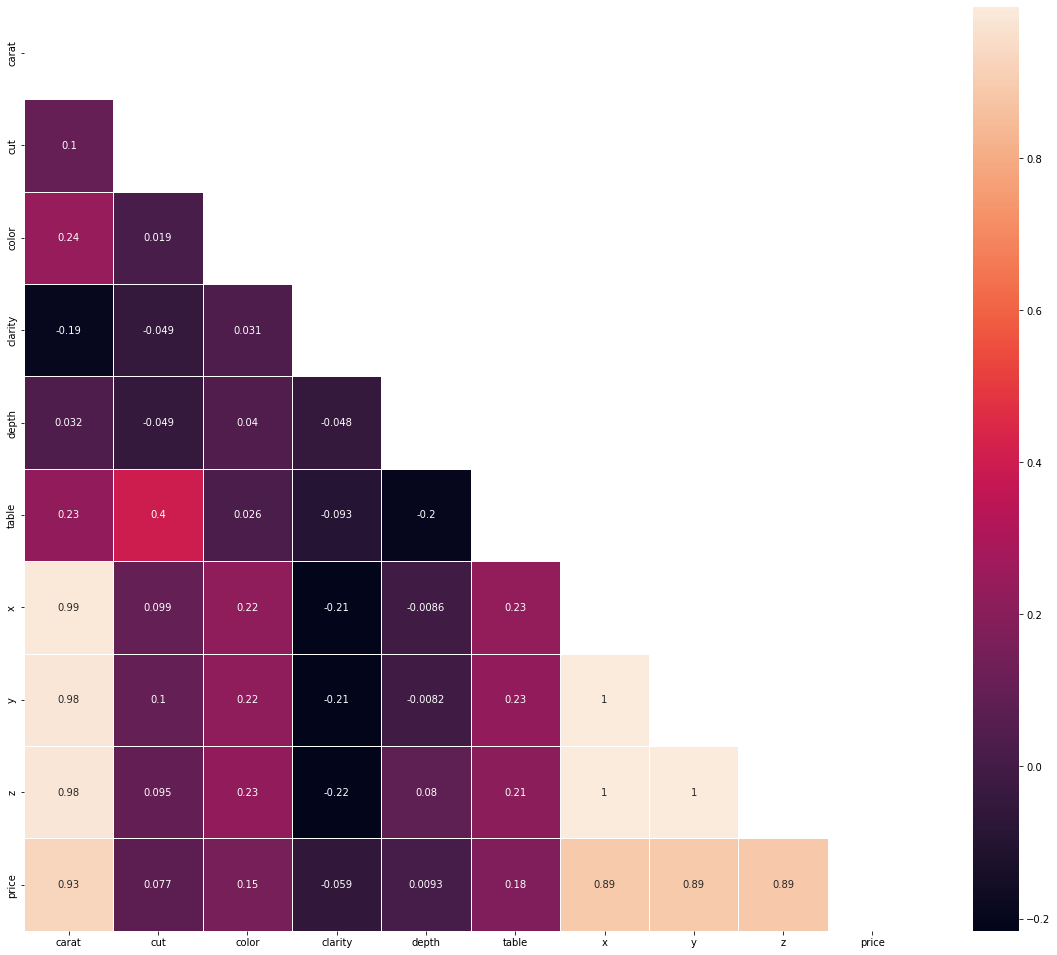

In [118]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df_corr)
sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap="rocket");
plt.show()

In [119]:
X = df.drop('price', axis=1)
y = df['price']

### FEATURE SELECTION

In [120]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.25891447 0.00184757 0.02889788 0.05095354 0.00322445 0.00295796
 0.2313276  0.2353634  0.18651313]


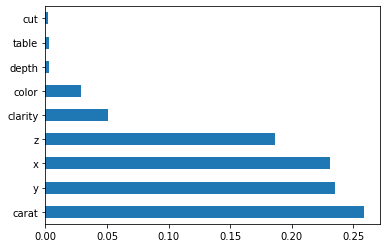

In [121]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [122]:
top_10 = pd.DataFrame({'Feature Importance': feat_importances.nlargest(10)})

In [123]:
top_10

Feature Importance
carat              0.258914
y                  0.235363
x                  0.231328
z                  0.186513
clarity            0.050954
color              0.028898
depth              0.003224
table              0.002958
cut                0.001848

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [125]:
X = scaler.fit_transform(X)

In [126]:
from sklearn.model_selection import train_test_split 

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

In [128]:
from sklearn.metrics import mean_squared_error, r2_score

### MODEL DEVELOPMENT

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [131]:
y_pred = reg.predict(X_test)

In [132]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")

Mean Squared Error: 1020450.719054828
R-squared score: 0.9147080267664233


In [133]:
from sklearn.tree import DecisionTreeRegressor

In [134]:
tree_reg = DecisionTreeRegressor()

In [135]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [136]:
y_pred = tree_reg.predict(X_test)

In [137]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")

Mean Squared Error: 509303.35914576304
R-squared score: 0.9574310766165502


In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
rf_reg = RandomForestRegressor()

In [140]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [141]:
y_pred = rf_reg.predict(X_test)

In [142]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")

Mean Squared Error: 282995.1104486325
R-squared score: 0.9763465193027896


In [143]:
import xgboost as xgb

In [144]:
xgb_reg = xgb.XGBRegressor()

In [145]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [146]:
y_pred = xgb_reg.predict(X_test)

In [147]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")

Mean Squared Error: 264421.5155893111
R-squared score: 0.9778989495436736


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

In [149]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [150]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(1)
])

In [151]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [152]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

In [153]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
3400/3400 [==============================] - 24s 6ms/step - loss: 21641028.0000 - mae: 3347.0842 - mse: 21641028.0000 - val_loss: 16219556.0000 - val_mae: 2939.5391 - val_mse: 16219556.0000
Epoch 2/10
3400/3400 [==============================] - 20s 6ms/step - loss: 10478985.0000 - mae: 2294.5913 - mse: 10478985.0000 - val_loss: 4388335.5000 - val_mae: 1537.7073 - val_mse: 4388335.5000
Epoch 3/10
3400/3400 [==============================] - 18s 5ms/step - loss: 2947248.0000 - mae: 1120.1680 - mse: 2947248.0000 - val_loss: 1266503.5000 - val_mae: 687.8838 - val_mse: 1266503.5000
Epoch 4/10
3400/3400 [==============================] - 19s 6ms/step - loss: 1613247.8750 - mae: 802.0286 - mse: 1613247.8750 - val_loss: 558789.8750 - val_mae: 411.7999 - val_mse: 558789.8750
Epoch 5/10
3400/3400 [==============================] - 18s 5ms/step - loss: 1554758.2500 - mae: 788.4426 - mse: 1554758.2500 - val_loss: 502055.5000 - val_mae: 404.8423 - val_mse: 502055.5000
Epoch 6/10
3400/34

In [154]:
y_pred = model.predict(X_test)

1417/1417 [==============================] - 3s 2ms/step


In [155]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")

Mean Squared Error: 492021.2002228993
R-squared score: 0.9588755652221662


### XGB MODEL SHOWS THE BEST ACCURACY 

In [156]:
xgb_reg.save_model('xgb_model.json')